[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_2_Compare_Loss_Function_Binary_Classification_Diabetes.ipynb)

# Compare the Loss Functions on a  Binary Classification Task using Diabetes Datasets

## Data Visualization and Preprocessing

In [2]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/Diabetes.csv

--2018-06-15 12:58:22--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/Diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1268166 (1.2M) [text/plain]
Saving to: ‘Diabetes.csv’

Diabetes.csv        100%[===================>]   1.21M  5.24MB/s    in 0.2s    

2018-06-15 12:58:22 (5.24 MB/s) - ‘Diabetes.csv’ saved [1268166/1268166]



In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from keras.models import Sequential
from keras import losses
from keras.layers import Dense, regularizers, Activation, LeakyReLU, PReLU
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,roc_curve,auc, confusion_matrix

Using TensorFlow backend.


In [5]:
rawdf = pd.read_csv('Diabetes.csv')
rawdf.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23  43.509726          1.213191   21         0   
1                47            36  21.240576          0.158365   23         0   
2                52            35  41.511523          0.079019   23         0   
3                25           304  29.582192          1.282870   43         1   
4                27            35  42.604536          0.549542   22         0   

            Physician   Ln(Age)  
0         Dan Drayton  3.044522  
1    Anthony Frizzell  3.135494  
2  Gordon Fredrickson  3.135494  
3        Chad Corbitt  3.761200  
4     Zachary Fellows  3.091042

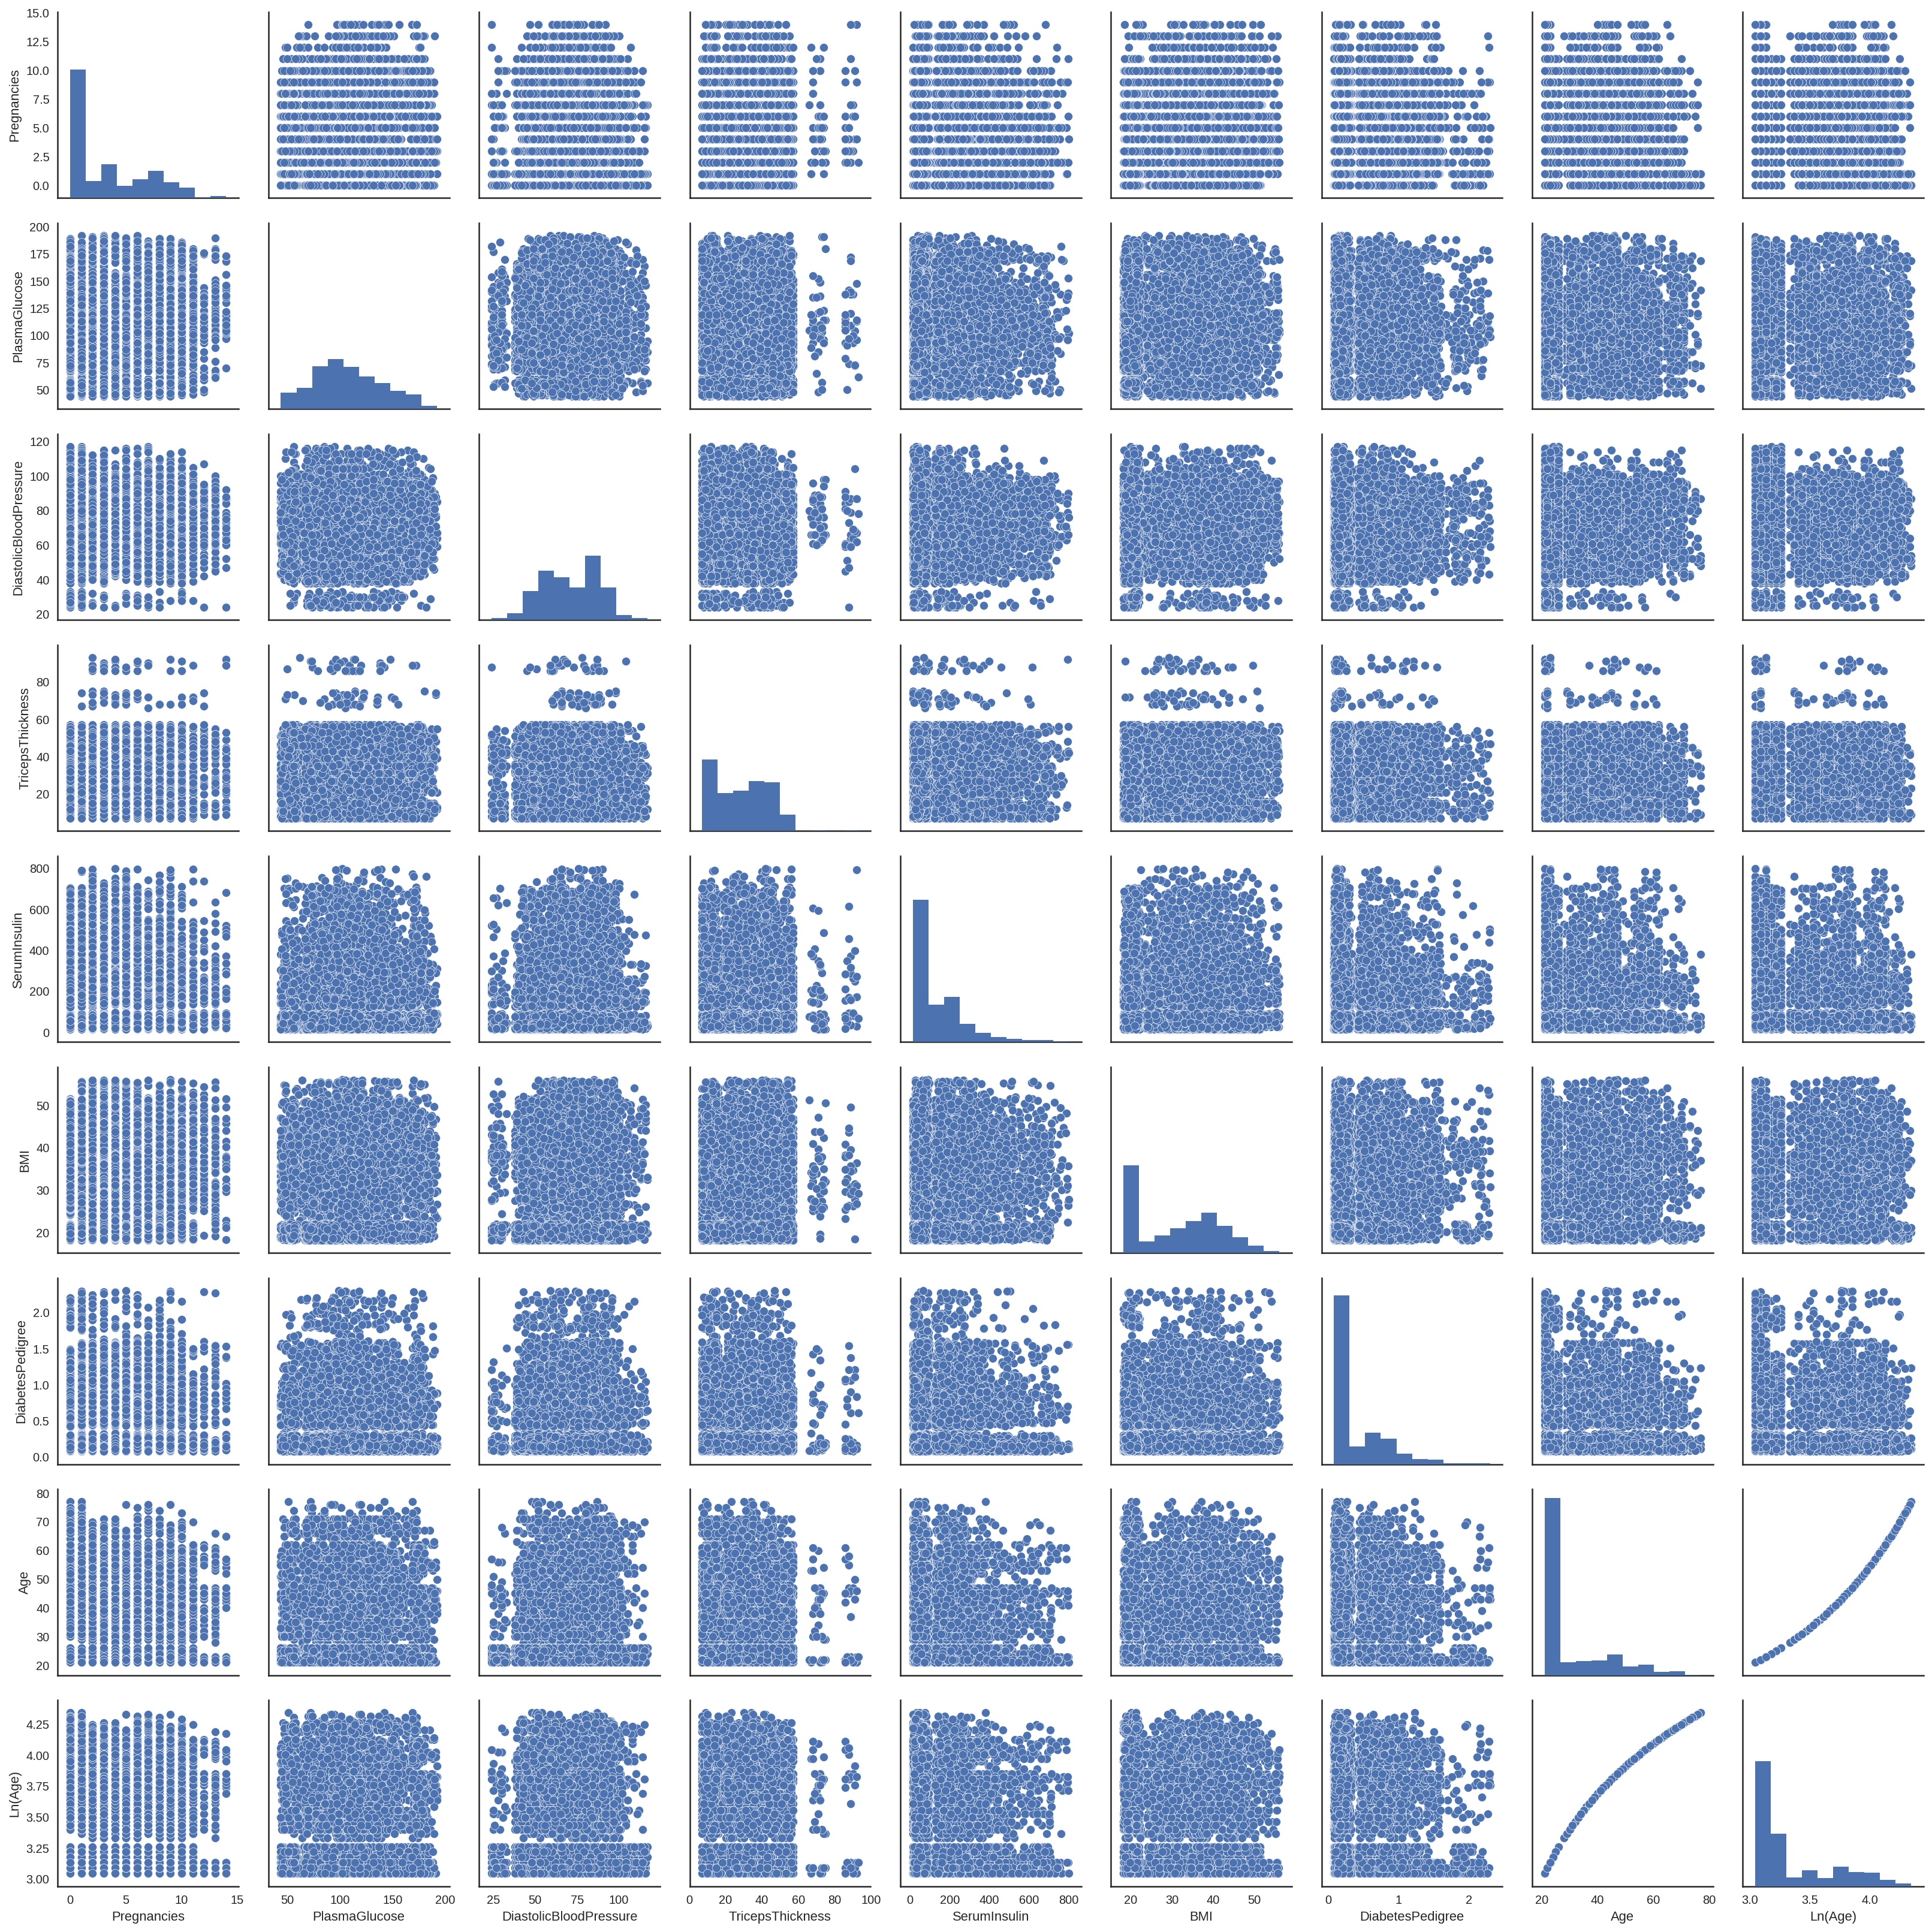

In [6]:
plt.style.use('seaborn-white')
cols = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','Ln(Age)']
sns.pairplot(rawdf[cols])

In [0]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']
                  
df[scale_features] = ss.fit_transform(df[scale_features])

In [0]:
minmax = MinMaxScaler()
minmax_features = ['Pregnancies','DiabetesPedigree','Age','Ln(Age)']
df[minmax_features] = minmax.fit_transform(df[minmax_features])

In [9]:
df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778     0.000000       1.974401                0.523884   
1    1147438     0.571429      -0.495823                1.299626   
2    1640031     0.500000       0.223356               -1.445306   
3    1883350     0.642857      -0.151868                0.404539   
4    1424119     0.071429      -0.714703               -0.729237   

   TricepsThickness  SerumInsulin       BMI  DiabetesPedigree       Age  \
0          0.356298     -0.863136  1.229683          0.510511  0.000000   
1          1.249448     -0.765438 -1.052302          0.036123  0.035714   
2          1.592967     -0.772953  1.024922          0.000438  0.035714   
3         -0.262036      1.248633 -0.197512          0.541848  0.392857   
4         -0.124629     -0.772953  1.136926          0.212047  0.017857   

   Diabetic           Physician   Ln(Age)  
0         0         Dan Drayton  0.000000  
1         0    Anthony Frizzell  0.070017  
2         0  Gordon Fredrickson  0.070017  
3         1        Chad Corbitt  0.551595  
4         0     Zachary Fellows  0.035804

In [11]:
X = df.drop(['PatientID','Physician','Diabetic'],axis=1).values
y = (df['Diabetic'].values).reshape(-1,1)

X_train,X_test, Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(12000, 9) (12000, 1) (3000, 9) (3000, 1)


In [0]:
# For keras
def plot_confusion_matrix(model, X, Y):
  y_pred = model.predict_classes(X, verbose=0)
  plt.figure(figsize=(8,6))
  sns.heatmap(pd.DataFrame(confusion_matrix(Y, y_pred)), annot=True, fmt='d', cmap='YlGnBu',alpha=0.8,vmin=0)
  

## 1 .Deep Neural Networks for Classification using different Activation Functions

In [0]:
batch_size = 256
epochs = 100

In [0]:
def model(loss):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile('adam',loss=loss, metrics=['accuracy'])
  return model

### 1.1  Loss = Mean Squared Loss

In [0]:
loss_1 =losses.mean_squared_error

In [16]:
model_1 = model(loss_1)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.2301 - acc: 0.6461 - val_loss: 0.1877 - val_acc: 0.7463
Epoch 2/100
 - 0s - loss: 0.1620 - acc: 0.7704 - val_loss: 0.1432 - val_acc: 0.7997
Epoch 3/100
 - 0s - loss: 0.1381 - acc: 0.8027 - val_loss: 0.1313 - val_acc: 0.8157
Epoch 4/100
 - 0s - loss: 0.1309 - acc: 0.8143 - val_loss: 0.1263 - val_acc: 0.8217
Epoch 5/100
 - 0s - loss: 0.1271 - acc: 0.8190 - val_loss: 0.1242 - val_acc: 0.8253
Epoch 6/100
 - 0s - loss: 0.1236 - acc: 0.8239 - val_loss: 0.1208 - val_acc: 0.8300
Epoch 7/100
 - 0s - loss: 0.1210 - acc: 0.8281 - val_loss: 0.1188 - val_acc: 0.8327
Epoch 8/100
 - 0s - loss: 0.1185 - acc: 0.8316 - val_loss: 0.1177 - val_acc: 0.8330
Epoch 9/100
 - 0s - loss: 0.1154 - acc: 0.8388 - val_loss: 0.1142 - val_acc: 0.8387
Epoch 10/100
 - 0s - loss: 0.1129 - acc: 0.8432 - val_loss: 0.1129 - val_acc: 0.8413
Epoch 11/100
 - 0s - loss: 0.1103 - acc: 0.8476 - val_loss: 0.1111 - val_acc: 0.8410
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.0617 - acc: 0.9182 - val_loss: 0.0721 - val_acc: 0.8977
Epoch 35/100
 - 0s - loss: 0.0609 - acc: 0.9190 - val_loss: 0.0727 - val_acc: 0.8987
Epoch 36/100
 - 0s - loss: 0.0604 - acc: 0.9198 - val_loss: 0.0729 - val_acc: 0.9003
Epoch 37/100
 - 0s - loss: 0.0607 - acc: 0.9182 - val_loss: 0.0707 - val_acc: 0.9023
Epoch 38/100
 - 0s - loss: 0.0601 - acc: 0.9190 - val_loss: 0.0731 - val_acc: 0.8990
Epoch 39/100
 - 0s - loss: 0.0595 - acc: 0.9200 - val_loss: 0.0712 - val_acc: 0.9007
Epoch 40/100
 - 0s - loss: 0.0593 - acc: 0.9218 - val_loss: 0.0703 - val_acc: 0.9013
Epoch 41/100
 - 0s - loss: 0.0591 - acc: 0.9211 - val_loss: 0.0708 - val_acc: 0.8997
Epoch 42/100
 - 0s - loss: 0.0582 - acc: 0.9238 - val_loss: 0.0718 - val_acc: 0.9030
Epoch 43/100
 - 0s - loss: 0.0580 - acc: 0.9244 - val_loss: 0.0709 - val_acc: 0.9043
Epoch 44/100
 - 0s - loss: 0.0582 - acc: 0.9236 - val_loss: 0.0709 - val_acc: 0.9007
Epoch 45/100
 - 0s - loss: 0.0574 - acc: 0.9258 - val_loss: 0.0711 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0521 - acc: 0.9342 - val_loss: 0.0702 - val_acc: 0.9060
Epoch 69/100
 - 0s - loss: 0.0527 - acc: 0.9320 - val_loss: 0.0700 - val_acc: 0.9063
Epoch 70/100
 - 0s - loss: 0.0522 - acc: 0.9311 - val_loss: 0.0679 - val_acc: 0.9043
Epoch 71/100
 - 0s - loss: 0.0514 - acc: 0.9339 - val_loss: 0.0708 - val_acc: 0.9020
Epoch 72/100
 - 0s - loss: 0.0513 - acc: 0.9343 - val_loss: 0.0701 - val_acc: 0.9050
Epoch 73/100
 - 0s - loss: 0.0513 - acc: 0.9351 - val_loss: 0.0725 - val_acc: 0.8993
Epoch 74/100
 - 0s - loss: 0.0506 - acc: 0.9347 - val_loss: 0.0686 - val_acc: 0.9067
Epoch 75/100
 - 0s - loss: 0.0503 - acc: 0.9357 - val_loss: 0.0678 - val_acc: 0.9070
Epoch 76/100
 - 0s - loss: 0.0502 - acc: 0.9351 - val_loss: 0.0694 - val_acc: 0.9070
Epoch 77/100
 - 0s - loss: 0.0500 - acc: 0.9359 - val_loss: 0.0706 - val_acc: 0.9043
Epoch 78/100
 - 0s - loss: 0.0510 - acc: 0.9341 - val_loss: 0.0713 - val_acc: 0.9013
Epoch 79/100
 - 0s - loss: 0.0500 - acc: 0.9354 - val_loss: 0.069

#### For a binary classification, it is meaningful to use another metrics to evaluate model

             precision    recall  f1-score   support

          0     0.9275    0.9336    0.9305      2002
          1     0.8650    0.8537    0.8593       998

avg / total     0.9067    0.9070    0.9068      3000



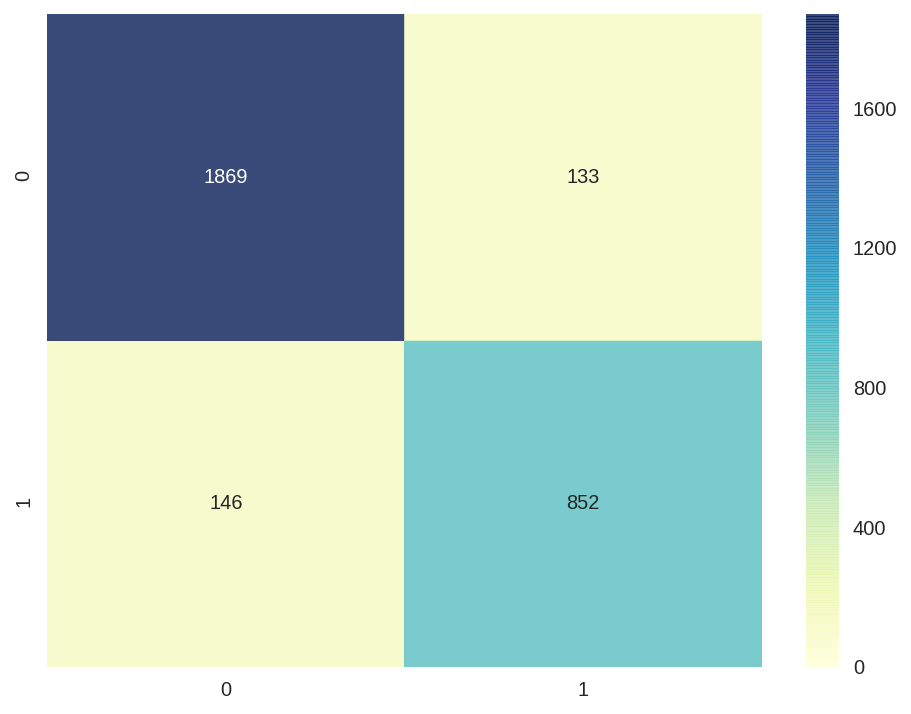

In [17]:
y_pred_1 = model_1.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_1,digits=4))
plot_confusion_matrix(model_1,X_test,Y_test)

In [18]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 94.33 %     loss = 0.045606
Testing Accuracy = 90.70 %    loss = 0.068048


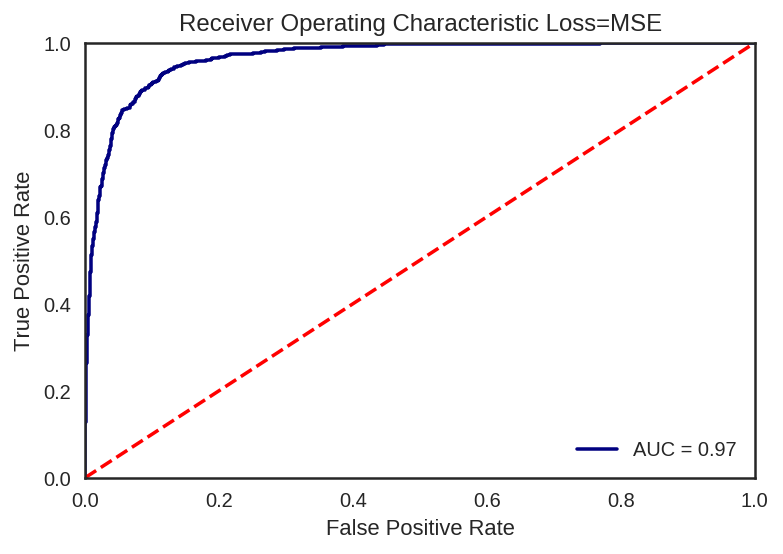

In [19]:
# calculate the fpr and tpr for all thresholds of the classification

preds_1 = model_1.predict_proba(X_test)
fpr_1, tpr_1, _= roc_curve(Y_test,preds_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Loss=MSE')
plt.plot(fpr_1, tpr_1, 'navy', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.2 Loss = Mean Absolute Error

In [0]:
loss_2 =losses.mean_absolute_error

In [21]:
model_2 = model(loss_2)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.4461 - acc: 0.6696 - val_loss: 0.3659 - val_acc: 0.7200
Epoch 2/100
 - 0s - loss: 0.3138 - acc: 0.7243 - val_loss: 0.2783 - val_acc: 0.7410
Epoch 3/100
 - 0s - loss: 0.2590 - acc: 0.7600 - val_loss: 0.2350 - val_acc: 0.7813
Epoch 4/100
 - 0s - loss: 0.2244 - acc: 0.7912 - val_loss: 0.2058 - val_acc: 0.8080
Epoch 5/100
 - 0s - loss: 0.2048 - acc: 0.8067 - val_loss: 0.1953 - val_acc: 0.8133
Epoch 6/100
 - 0s - loss: 0.1964 - acc: 0.8112 - val_loss: 0.1898 - val_acc: 0.8210
Epoch 7/100
 - 0s - loss: 0.1909 - acc: 0.8168 - val_loss: 0.1838 - val_acc: 0.8230
Epoch 8/100
 - 0s - loss: 0.1861 - acc: 0.8202 - val_loss: 0.1799 - val_acc: 0.8260
Epoch 9/100
 - 0s - loss: 0.1827 - acc: 0.8220 - val_loss: 0.1762 - val_acc: 0.8293
Epoch 10/100
 - 0s - loss: 0.1790 - acc: 0.8263 - val_loss: 0.1748 - val_acc: 0.8333
Epoch 11/100
 - 0s - loss: 0.1753 - acc: 0.8307 - val_loss: 0.1740 - val_acc: 0.8303
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.1188 - acc: 0.8852 - val_loss: 0.1209 - val_acc: 0.8817
Epoch 35/100
 - 0s - loss: 0.1174 - acc: 0.8866 - val_loss: 0.1188 - val_acc: 0.8840
Epoch 36/100
 - 0s - loss: 0.1147 - acc: 0.8898 - val_loss: 0.1179 - val_acc: 0.8847
Epoch 37/100
 - 0s - loss: 0.1138 - acc: 0.8918 - val_loss: 0.1184 - val_acc: 0.8843
Epoch 38/100
 - 0s - loss: 0.1135 - acc: 0.8908 - val_loss: 0.1218 - val_acc: 0.8807
Epoch 39/100
 - 0s - loss: 0.1112 - acc: 0.8931 - val_loss: 0.1169 - val_acc: 0.8867
Epoch 40/100
 - 0s - loss: 0.1100 - acc: 0.8944 - val_loss: 0.1187 - val_acc: 0.8830
Epoch 41/100
 - 0s - loss: 0.1081 - acc: 0.8970 - val_loss: 0.1158 - val_acc: 0.8860
Epoch 42/100
 - 0s - loss: 0.1077 - acc: 0.8968 - val_loss: 0.1126 - val_acc: 0.8903
Epoch 43/100
 - 0s - loss: 0.1062 - acc: 0.8985 - val_loss: 0.1145 - val_acc: 0.8873
Epoch 44/100
 - 0s - loss: 0.1050 - acc: 0.8998 - val_loss: 0.1121 - val_acc: 0.8927
Epoch 45/100
 - 0s - loss: 0.1041 - acc: 0.9000 - val_loss: 0.1122 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0906 - acc: 0.9132 - val_loss: 0.1052 - val_acc: 0.8970
Epoch 69/100
 - 0s - loss: 0.0893 - acc: 0.9150 - val_loss: 0.1085 - val_acc: 0.8913
Epoch 70/100
 - 0s - loss: 0.0891 - acc: 0.9145 - val_loss: 0.1077 - val_acc: 0.8953
Epoch 71/100
 - 0s - loss: 0.0887 - acc: 0.9141 - val_loss: 0.1058 - val_acc: 0.8960
Epoch 72/100
 - 0s - loss: 0.0875 - acc: 0.9169 - val_loss: 0.1069 - val_acc: 0.8943
Epoch 73/100
 - 0s - loss: 0.0878 - acc: 0.9157 - val_loss: 0.1059 - val_acc: 0.8950
Epoch 74/100
 - 0s - loss: 0.0876 - acc: 0.9172 - val_loss: 0.1073 - val_acc: 0.8930
Epoch 75/100
 - 0s - loss: 0.0873 - acc: 0.9167 - val_loss: 0.1070 - val_acc: 0.8957
Epoch 76/100
 - 0s - loss: 0.0868 - acc: 0.9177 - val_loss: 0.1045 - val_acc: 0.8977
Epoch 77/100
 - 0s - loss: 0.0859 - acc: 0.9176 - val_loss: 0.1049 - val_acc: 0.8970
Epoch 78/100
 - 0s - loss: 0.0856 - acc: 0.9185 - val_loss: 0.1077 - val_acc: 0.8930
Epoch 79/100
 - 0s - loss: 0.0852 - acc: 0.9176 - val_loss: 0.104

             precision    recall  f1-score   support

          0     0.9172    0.9346    0.9258      2002
          1     0.8635    0.8307    0.8468       998

avg / total     0.8993    0.9000    0.8995      3000



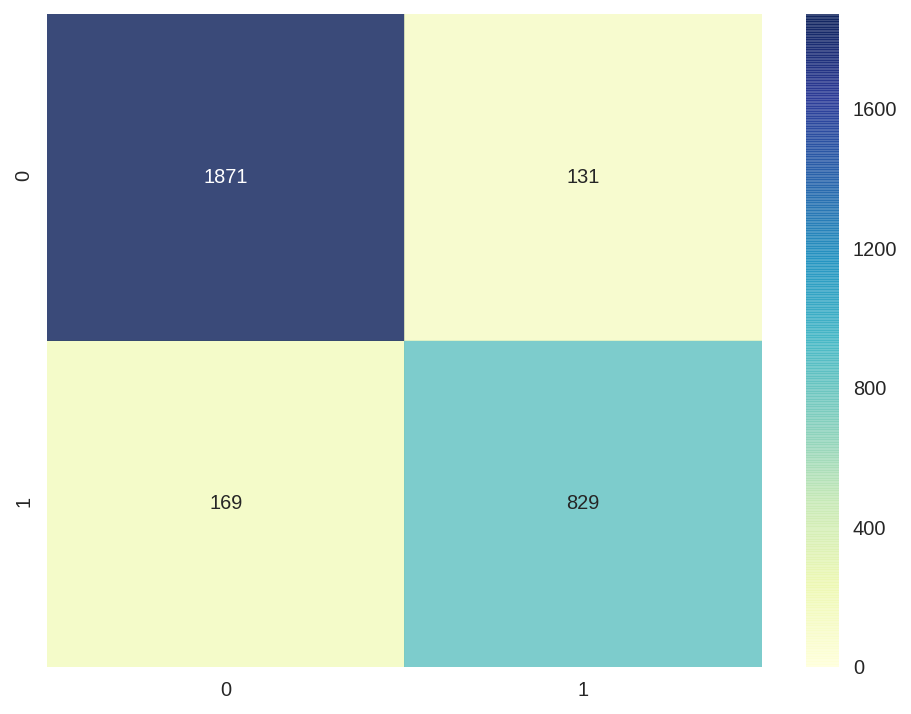

In [22]:
y_pred_2 = model_2.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_2,digits=4))
plot_confusion_matrix(model_2,X_test,Y_test)

In [23]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 92.52 %     loss = 0.078413
Testing Accuracy = 90.00 %    loss = 0.102860


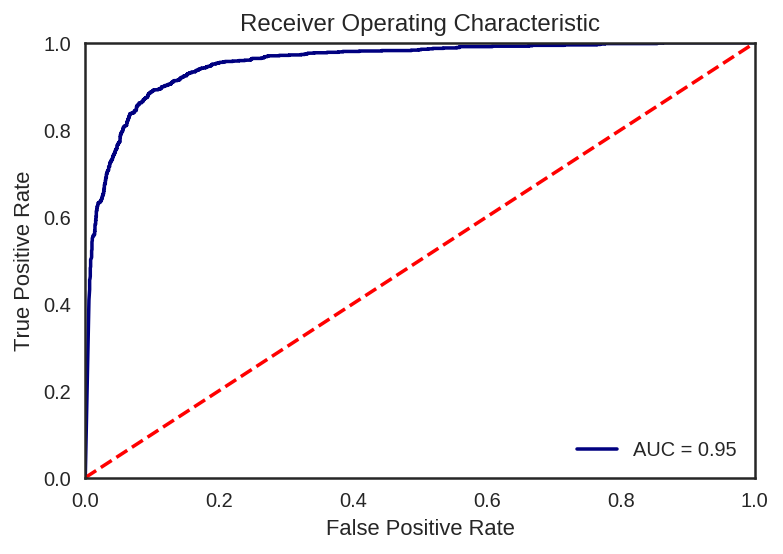

In [24]:
preds_2 = model_2.predict_proba(X_test)
fpr_2, tpr_2, _= roc_curve(Y_test,preds_2)
roc_auc_2 = auc(fpr_2, tpr_2)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_2, tpr_2, 'navy', label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.3 loss = mean_squared_logarithmic_error

In [0]:
loss_3 = losses.mean_squared_logarithmic_error

In [26]:
model_3 = model(loss_3)
model_3_history = model_3.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.1078 - acc: 0.6558 - val_loss: 0.0849 - val_acc: 0.7193
Epoch 2/100
 - 0s - loss: 0.0778 - acc: 0.7495 - val_loss: 0.0698 - val_acc: 0.7787
Epoch 3/100
 - 0s - loss: 0.0672 - acc: 0.7907 - val_loss: 0.0627 - val_acc: 0.8007
Epoch 4/100
 - 0s - loss: 0.0627 - acc: 0.8066 - val_loss: 0.0601 - val_acc: 0.8147
Epoch 5/100
 - 0s - loss: 0.0607 - acc: 0.8152 - val_loss: 0.0592 - val_acc: 0.8107
Epoch 6/100
 - 0s - loss: 0.0592 - acc: 0.8222 - val_loss: 0.0580 - val_acc: 0.8213
Epoch 7/100
 - 0s - loss: 0.0578 - acc: 0.8259 - val_loss: 0.0567 - val_acc: 0.8237
Epoch 8/100
 - 0s - loss: 0.0563 - acc: 0.8313 - val_loss: 0.0557 - val_acc: 0.8367
Epoch 9/100
 - 0s - loss: 0.0548 - acc: 0.8347 - val_loss: 0.0539 - val_acc: 0.8383
Epoch 10/100
 - 0s - loss: 0.0531 - acc: 0.8418 - val_loss: 0.0528 - val_acc: 0.8423
Epoch 11/100
 - 0s - loss: 0.0514 - acc: 0.8454 - val_loss: 0.0511 - val_acc: 0.8500
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.0296 - acc: 0.9167 - val_loss: 0.0347 - val_acc: 0.8933
Epoch 35/100
 - 0s - loss: 0.0293 - acc: 0.9150 - val_loss: 0.0349 - val_acc: 0.8987
Epoch 36/100
 - 0s - loss: 0.0292 - acc: 0.9179 - val_loss: 0.0348 - val_acc: 0.8967
Epoch 37/100
 - 0s - loss: 0.0287 - acc: 0.9190 - val_loss: 0.0346 - val_acc: 0.8967
Epoch 38/100
 - 0s - loss: 0.0289 - acc: 0.9175 - val_loss: 0.0346 - val_acc: 0.8960
Epoch 39/100
 - 0s - loss: 0.0289 - acc: 0.9183 - val_loss: 0.0346 - val_acc: 0.8927
Epoch 40/100
 - 0s - loss: 0.0286 - acc: 0.9183 - val_loss: 0.0347 - val_acc: 0.9000
Epoch 41/100
 - 0s - loss: 0.0285 - acc: 0.9191 - val_loss: 0.0349 - val_acc: 0.8950
Epoch 42/100
 - 0s - loss: 0.0278 - acc: 0.9218 - val_loss: 0.0347 - val_acc: 0.8927
Epoch 43/100
 - 0s - loss: 0.0282 - acc: 0.9216 - val_loss: 0.0344 - val_acc: 0.8987
Epoch 44/100
 - 0s - loss: 0.0281 - acc: 0.9200 - val_loss: 0.0340 - val_acc: 0.8957
Epoch 45/100
 - 0s - loss: 0.0278 - acc: 0.9212 - val_loss: 0.0346 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0250 - acc: 0.9292 - val_loss: 0.0345 - val_acc: 0.9003
Epoch 69/100
 - 0s - loss: 0.0247 - acc: 0.9305 - val_loss: 0.0339 - val_acc: 0.9030
Epoch 70/100
 - 0s - loss: 0.0251 - acc: 0.9306 - val_loss: 0.0343 - val_acc: 0.9070
Epoch 71/100
 - 0s - loss: 0.0244 - acc: 0.9328 - val_loss: 0.0338 - val_acc: 0.9000
Epoch 72/100
 - 0s - loss: 0.0246 - acc: 0.9317 - val_loss: 0.0342 - val_acc: 0.8990
Epoch 73/100
 - 0s - loss: 0.0243 - acc: 0.9330 - val_loss: 0.0340 - val_acc: 0.9043
Epoch 74/100
 - 0s - loss: 0.0238 - acc: 0.9342 - val_loss: 0.0338 - val_acc: 0.9023
Epoch 75/100
 - 0s - loss: 0.0241 - acc: 0.9333 - val_loss: 0.0342 - val_acc: 0.9003
Epoch 76/100
 - 0s - loss: 0.0237 - acc: 0.9345 - val_loss: 0.0338 - val_acc: 0.9033
Epoch 77/100
 - 0s - loss: 0.0238 - acc: 0.9343 - val_loss: 0.0339 - val_acc: 0.9040
Epoch 78/100
 - 0s - loss: 0.0238 - acc: 0.9345 - val_loss: 0.0342 - val_acc: 0.9003
Epoch 79/100
 - 0s - loss: 0.0234 - acc: 0.9365 - val_loss: 0.034

             precision    recall  f1-score   support

          0     0.9192    0.9431    0.9310      2002
          1     0.8795    0.8337    0.8560       998

avg / total     0.9060    0.9067    0.9060      3000



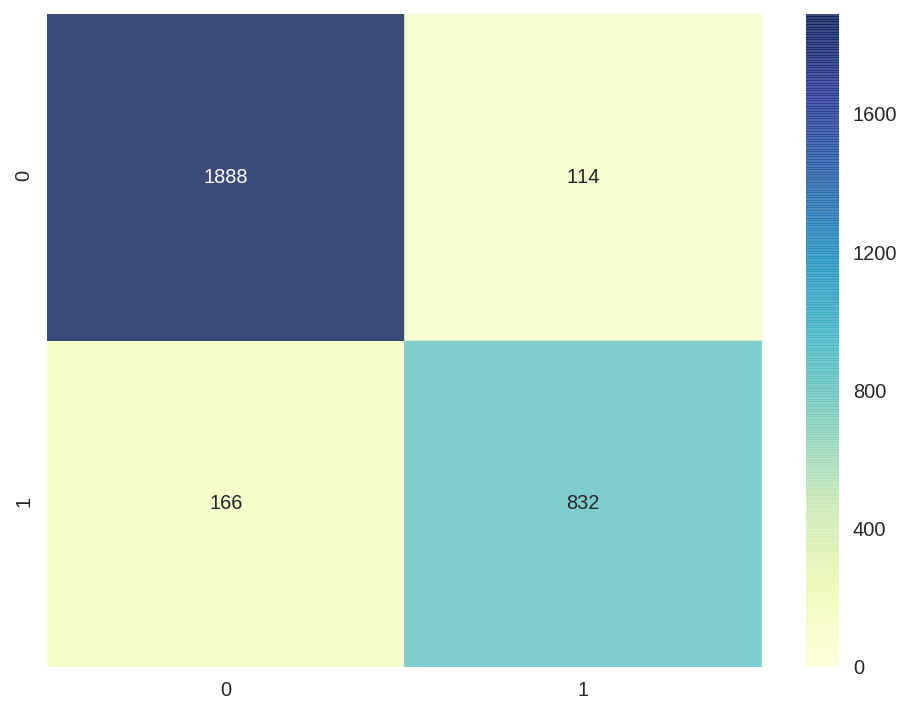

In [27]:
y_pred_3 = model_3.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_3,digits=4))
plot_confusion_matrix(model_3,X_test,Y_test)

In [28]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 94.47 %     loss = 0.020973
Testing Accuracy = 90.67 %    loss = 0.034001


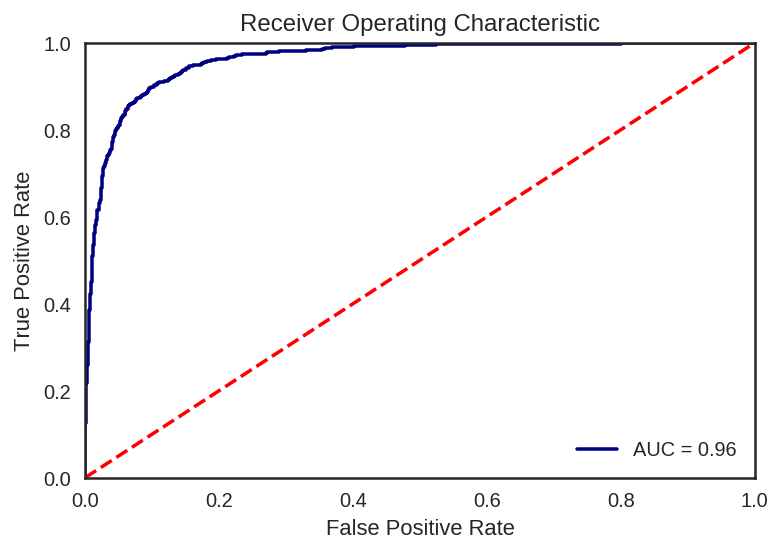

In [29]:
preds_3 = model_3.predict_proba(X_test)
fpr_3, tpr_3, _= roc_curve(Y_test,preds_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_3, tpr_3, 'navy', label = 'AUC = %0.2f' % roc_auc_3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.4 loss = Squared hinge


In [0]:
loss_4 = losses.squared_hinge

In [31]:
model_4 = model(loss_4)
model_4_history = model_4.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.6926 - acc: 0.3334 - val_loss: 0.6691 - val_acc: 0.3327
Epoch 2/100
 - 0s - loss: 0.6671 - acc: 0.3335 - val_loss: 0.6675 - val_acc: 0.3327
Epoch 3/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 4/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 5/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 6/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 7/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 8/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 9/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 10/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 11/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 35/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 36/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 37/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 38/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 39/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 40/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 41/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 42/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 43/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 44/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 45/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 69/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 70/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 71/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 72/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 73/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 74/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 75/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 76/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 77/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 78/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 79/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.667

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0     0.0000    0.0000    0.0000      2002
          1     0.3327    1.0000    0.4992       998

avg / total     0.1107    0.3327    0.1661      3000



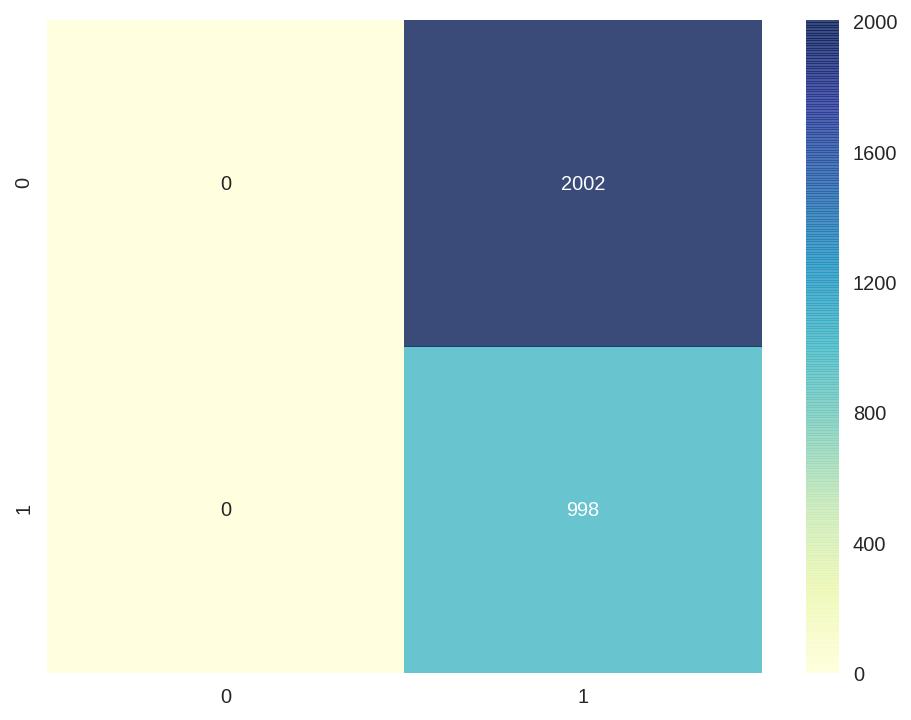

In [32]:
y_pred_4 = model_4.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_4,digits=4))
plot_confusion_matrix(model_4,X_test,Y_test)

In [33]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 33.35 %     loss = 0.666500
Testing Accuracy = 33.27 %    loss = 0.667333


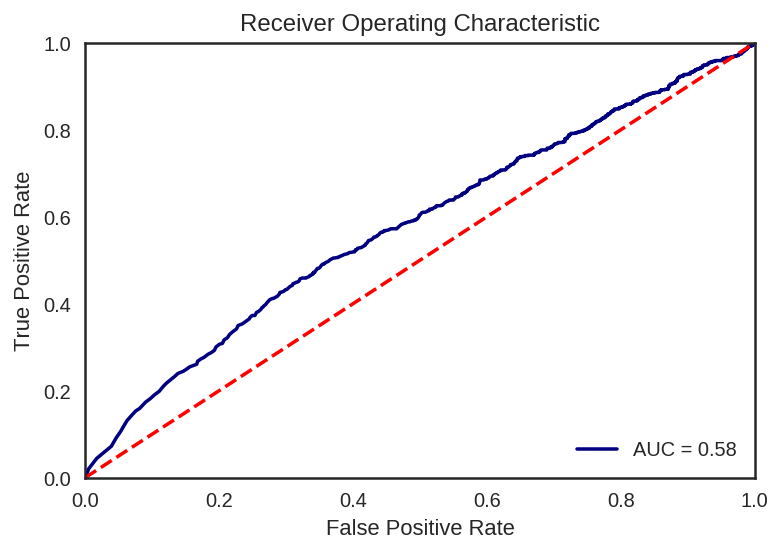

In [34]:
preds_4 = model_4.predict_proba(X_test)
fpr_4, tpr_4, _= roc_curve(Y_test,preds_4)
roc_auc_4 = auc(fpr_4, tpr_4)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_4, tpr_4, 'navy', label = 'AUC = %0.2f' % roc_auc_4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.5 loss=hinge

In [0]:
loss_5 = losses.hinge

In [36]:
model_5 = model(loss_5)
model_5_history = model_5.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.7539 - acc: 0.3338 - val_loss: 0.6858 - val_acc: 0.3327
Epoch 2/100
 - 0s - loss: 0.6720 - acc: 0.3335 - val_loss: 0.6685 - val_acc: 0.3327
Epoch 3/100
 - 0s - loss: 0.6673 - acc: 0.3335 - val_loss: 0.6678 - val_acc: 0.3327
Epoch 4/100
 - 0s - loss: 0.6669 - acc: 0.3335 - val_loss: 0.6676 - val_acc: 0.3327
Epoch 5/100
 - 0s - loss: 0.6667 - acc: 0.3335 - val_loss: 0.6675 - val_acc: 0.3327
Epoch 6/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 7/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 8/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 9/100
 - 0s - loss: 0.6666 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 10/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 11/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6674 - val_acc: 0.3327
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 35/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 36/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 37/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 38/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 39/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 40/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 41/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 42/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 43/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 44/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 45/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 69/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 70/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 71/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 72/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 73/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 74/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 75/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 76/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 77/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 78/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.6673 - val_acc: 0.3327
Epoch 79/100
 - 0s - loss: 0.6665 - acc: 0.3335 - val_loss: 0.667

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0     0.0000    0.0000    0.0000      2002
          1     0.3327    1.0000    0.4992       998

avg / total     0.1107    0.3327    0.1661      3000



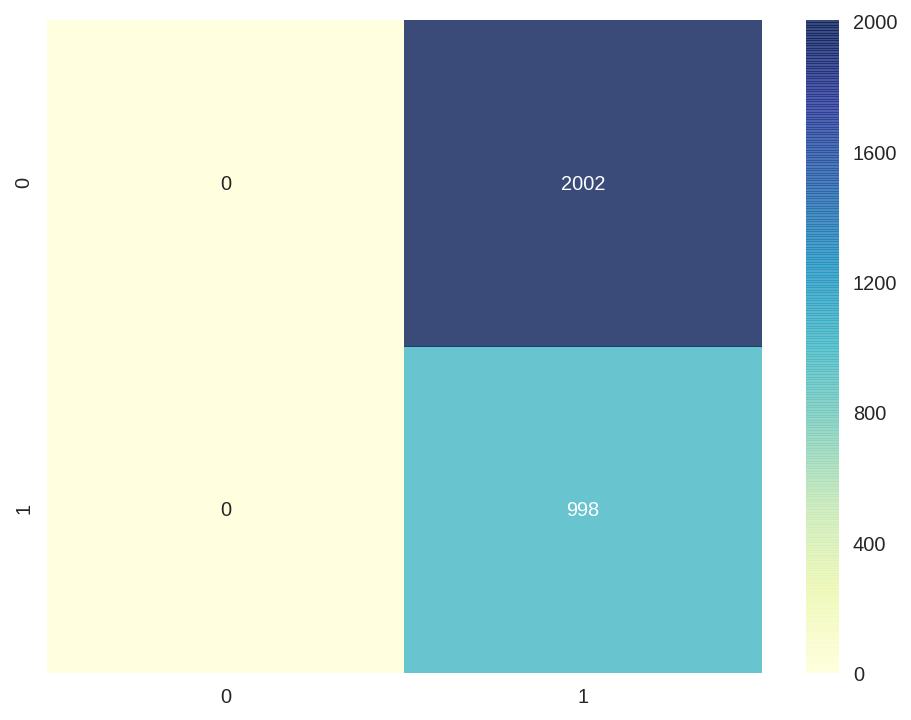

In [37]:
y_pred_5 = model_5.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_5,digits=4))
plot_confusion_matrix(model_5,X_test,Y_test)

In [38]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 33.35 %     loss = 0.666500
Testing Accuracy = 33.27 %    loss = 0.667334


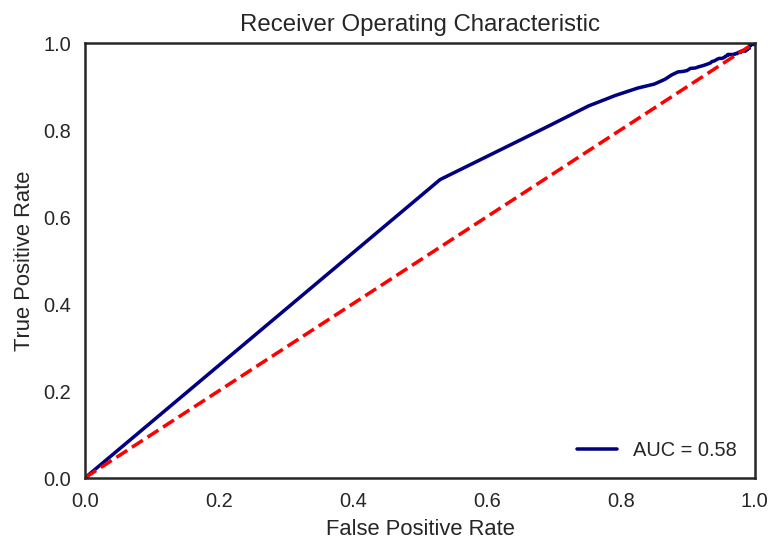

In [39]:
preds_5 = model_5.predict_proba(X_test)
fpr_5, tpr_5, _= roc_curve(Y_test,preds_5)
roc_auc_5 = auc(fpr_5, tpr_5)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_5, tpr_5, 'navy', label = 'AUC = %0.2f' % roc_auc_5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.6 loss= cosine_proximity

In [0]:
loss_6 = losses.cosine_proximity

In [41]:
model_6 = model(loss_6)
model_6_history = model_6.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: -3.3350e-01 - acc: 0.3943 - val_loss: -3.3267e-01 - val_acc: 0.3830
Epoch 2/100
 - 0s - loss: -3.3350e-01 - acc: 0.3941 - val_loss: -3.3267e-01 - val_acc: 0.3820
Epoch 3/100
 - 0s - loss: -3.3350e-01 - acc: 0.3932 - val_loss: -3.3267e-01 - val_acc: 0.3827
Epoch 4/100
 - 0s - loss: -3.3350e-01 - acc: 0.3917 - val_loss: -3.3267e-01 - val_acc: 0.3810
Epoch 5/100
 - 0s - loss: -3.3350e-01 - acc: 0.3913 - val_loss: -3.3267e-01 - val_acc: 0.3813
Epoch 6/100
 - 0s - loss: -3.3350e-01 - acc: 0.3910 - val_loss: -3.3267e-01 - val_acc: 0.3793
Epoch 7/100
 - 0s - loss: -3.3350e-01 - acc: 0.3910 - val_loss: -3.3267e-01 - val_acc: 0.3780
Epoch 8/100
 - 0s - loss: -3.3350e-01 - acc: 0.3893 - val_loss: -3.3267e-01 - val_acc: 0.3750
Epoch 9/100
 - 0s - loss: -3.3350e-01 - acc: 0.3882 - val_loss: -3.3267e-01 - val_acc: 0.3740
Epoch 10/100
 - 0s - loss: -3.3350e-01 - acc: 0.3872 - val_loss: -3.3267e-01 - val_acc: 0.3737
Epoch 11/1

 - 0s - loss: -3.3350e-01 - acc: 0.3638 - val_loss: -3.3267e-01 - val_acc: 0.3487
Epoch 33/100
 - 0s - loss: -3.3350e-01 - acc: 0.3625 - val_loss: -3.3267e-01 - val_acc: 0.3493
Epoch 34/100
 - 0s - loss: -3.3350e-01 - acc: 0.3608 - val_loss: -3.3267e-01 - val_acc: 0.3490
Epoch 35/100
 - 0s - loss: -3.3350e-01 - acc: 0.3605 - val_loss: -3.3267e-01 - val_acc: 0.3473
Epoch 36/100
 - 0s - loss: -3.3350e-01 - acc: 0.3590 - val_loss: -3.3267e-01 - val_acc: 0.3473
Epoch 37/100
 - 0s - loss: -3.3350e-01 - acc: 0.3578 - val_loss: -3.3267e-01 - val_acc: 0.3480
Epoch 38/100
 - 0s - loss: -3.3350e-01 - acc: 0.3567 - val_loss: -3.3267e-01 - val_acc: 0.3477
Epoch 39/100
 - 0s - loss: -3.3350e-01 - acc: 0.3558 - val_loss: -3.3267e-01 - val_acc: 0.3470
Epoch 40/100
 - 0s - loss: -3.3350e-01 - acc: 0.3532 - val_loss: -3.3267e-01 - val_acc: 0.3453
Epoch 41/100
 - 0s - loss: -3.3350e-01 - acc: 0.3532 - val_loss: -3.3267e-01 - val_acc: 0.3457
Epoch 42/100
 - 0s - loss: -3.3350e-01 - acc: 0.3530 - val_loss

 - 0s - loss: -3.3350e-01 - acc: 0.3370 - val_loss: -3.3267e-01 - val_acc: 0.3367
Epoch 65/100
 - 0s - loss: -3.3350e-01 - acc: 0.3362 - val_loss: -3.3267e-01 - val_acc: 0.3363
Epoch 66/100
 - 0s - loss: -3.3350e-01 - acc: 0.3363 - val_loss: -3.3267e-01 - val_acc: 0.3357
Epoch 67/100
 - 0s - loss: -3.3350e-01 - acc: 0.3358 - val_loss: -3.3267e-01 - val_acc: 0.3347
Epoch 68/100
 - 0s - loss: -3.3350e-01 - acc: 0.3354 - val_loss: -3.3267e-01 - val_acc: 0.3350
Epoch 69/100
 - 0s - loss: -3.3350e-01 - acc: 0.3350 - val_loss: -3.3267e-01 - val_acc: 0.3347
Epoch 70/100
 - 0s - loss: -3.3350e-01 - acc: 0.3349 - val_loss: -3.3267e-01 - val_acc: 0.3347
Epoch 71/100
 - 0s - loss: -3.3350e-01 - acc: 0.3346 - val_loss: -3.3267e-01 - val_acc: 0.3347
Epoch 72/100
 - 0s - loss: -3.3350e-01 - acc: 0.3343 - val_loss: -3.3267e-01 - val_acc: 0.3347
Epoch 73/100
 - 0s - loss: -3.3350e-01 - acc: 0.3343 - val_loss: -3.3267e-01 - val_acc: 0.3340
Epoch 74/100
 - 0s - loss: -3.3350e-01 - acc: 0.3342 - val_loss

 - 0s - loss: -3.3350e-01 - acc: 0.3335 - val_loss: -3.3267e-01 - val_acc: 0.3327
Epoch 97/100
 - 0s - loss: -3.3350e-01 - acc: 0.3335 - val_loss: -3.3267e-01 - val_acc: 0.3327
Epoch 98/100
 - 0s - loss: -3.3350e-01 - acc: 0.3335 - val_loss: -3.3267e-01 - val_acc: 0.3327
Epoch 99/100
 - 0s - loss: -3.3350e-01 - acc: 0.3335 - val_loss: -3.3267e-01 - val_acc: 0.3327
Epoch 100/100
 - 0s - loss: -3.3350e-01 - acc: 0.3335 - val_loss: -3.3267e-01 - val_acc: 0.3327


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0     0.0000    0.0000    0.0000      2002
          1     0.3327    1.0000    0.4992       998

avg / total     0.1107    0.3327    0.1661      3000



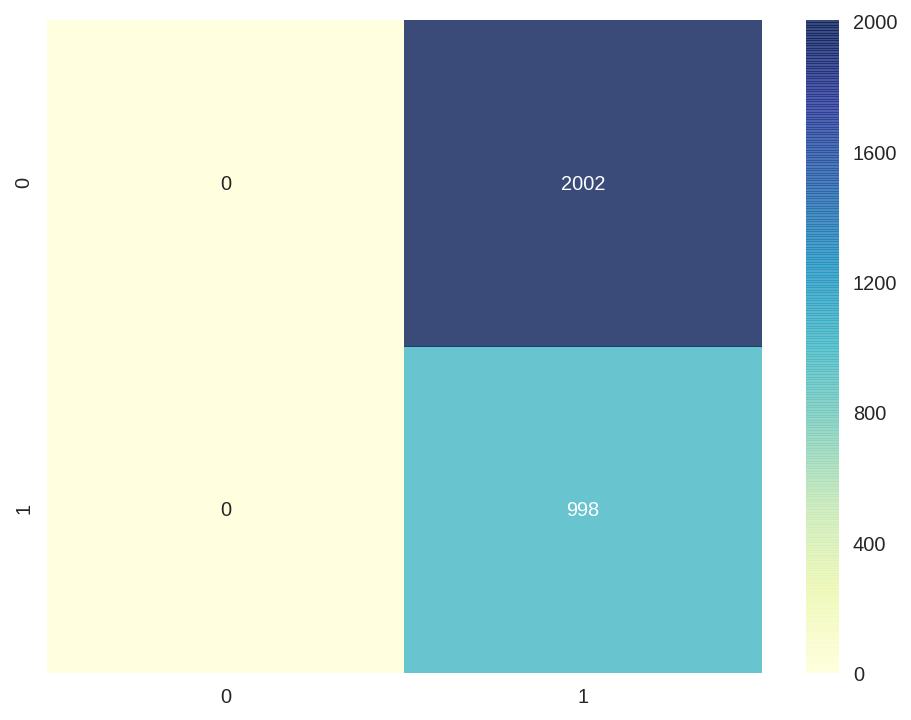

In [48]:
y_pred_6 = model_6.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_6,digits=4))
plot_confusion_matrix(model_6,X_test,Y_test)

In [49]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 33.35 %     loss = -0.333500
Testing Accuracy = 33.27 %    loss = -0.332667


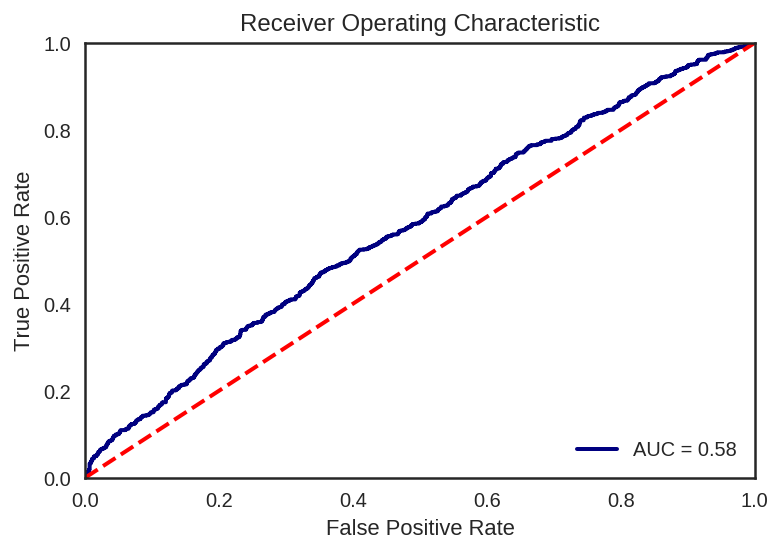

In [50]:
preds_6 = model_6.predict_proba(X_test)
fpr_6, tpr_6, _= roc_curve(Y_test,preds_6)
roc_auc_6 = auc(fpr_6, tpr_6)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_6, tpr_6, 'navy', label = 'AUC = %0.2f' % roc_auc_6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.7 loss = logcosh

In [0]:
loss_7 = losses.logcosh

In [52]:
model_7 = model(loss_7)
model_7_history = model_7.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.1027 - acc: 0.6618 - val_loss: 0.0880 - val_acc: 0.6943
Epoch 2/100
 - 0s - loss: 0.0814 - acc: 0.7419 - val_loss: 0.0726 - val_acc: 0.7780
Epoch 3/100
 - 0s - loss: 0.0685 - acc: 0.7921 - val_loss: 0.0634 - val_acc: 0.8063
Epoch 4/100
 - 0s - loss: 0.0621 - acc: 0.8115 - val_loss: 0.0594 - val_acc: 0.8250
Epoch 5/100
 - 0s - loss: 0.0594 - acc: 0.8173 - val_loss: 0.0573 - val_acc: 0.8270
Epoch 6/100
 - 0s - loss: 0.0578 - acc: 0.8236 - val_loss: 0.0560 - val_acc: 0.8307
Epoch 7/100
 - 0s - loss: 0.0563 - acc: 0.8299 - val_loss: 0.0548 - val_acc: 0.8337
Epoch 8/100
 - 0s - loss: 0.0552 - acc: 0.8317 - val_loss: 0.0538 - val_acc: 0.8373
Epoch 9/100
 - 0s - loss: 0.0537 - acc: 0.8372 - val_loss: 0.0528 - val_acc: 0.8407
Epoch 10/100
 - 0s - loss: 0.0523 - acc: 0.8411 - val_loss: 0.0514 - val_acc: 0.8450
Epoch 11/100
 - 0s - loss: 0.0509 - acc: 0.8496 - val_loss: 0.0509 - val_acc: 0.8487
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.0295 - acc: 0.9151 - val_loss: 0.0339 - val_acc: 0.8997
Epoch 35/100
 - 0s - loss: 0.0290 - acc: 0.9162 - val_loss: 0.0336 - val_acc: 0.9003
Epoch 36/100
 - 0s - loss: 0.0291 - acc: 0.9168 - val_loss: 0.0336 - val_acc: 0.8980
Epoch 37/100
 - 0s - loss: 0.0284 - acc: 0.9176 - val_loss: 0.0329 - val_acc: 0.9030
Epoch 38/100
 - 0s - loss: 0.0283 - acc: 0.9177 - val_loss: 0.0338 - val_acc: 0.8983
Epoch 39/100
 - 0s - loss: 0.0279 - acc: 0.9188 - val_loss: 0.0326 - val_acc: 0.9027
Epoch 40/100
 - 0s - loss: 0.0278 - acc: 0.9207 - val_loss: 0.0332 - val_acc: 0.8983
Epoch 41/100
 - 0s - loss: 0.0278 - acc: 0.9200 - val_loss: 0.0332 - val_acc: 0.9010
Epoch 42/100
 - 0s - loss: 0.0275 - acc: 0.9205 - val_loss: 0.0325 - val_acc: 0.9050
Epoch 43/100
 - 0s - loss: 0.0274 - acc: 0.9213 - val_loss: 0.0332 - val_acc: 0.8993
Epoch 44/100
 - 0s - loss: 0.0278 - acc: 0.9192 - val_loss: 0.0328 - val_acc: 0.9020
Epoch 45/100
 - 0s - loss: 0.0273 - acc: 0.9209 - val_loss: 0.0327 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0248 - acc: 0.9298 - val_loss: 0.0323 - val_acc: 0.9043
Epoch 69/100
 - 0s - loss: 0.0251 - acc: 0.9273 - val_loss: 0.0324 - val_acc: 0.9057
Epoch 70/100
 - 0s - loss: 0.0250 - acc: 0.9298 - val_loss: 0.0330 - val_acc: 0.9017
Epoch 71/100
 - 0s - loss: 0.0251 - acc: 0.9283 - val_loss: 0.0324 - val_acc: 0.9027
Epoch 72/100
 - 0s - loss: 0.0246 - acc: 0.9287 - val_loss: 0.0330 - val_acc: 0.9013
Epoch 73/100
 - 0s - loss: 0.0247 - acc: 0.9315 - val_loss: 0.0324 - val_acc: 0.9033
Epoch 74/100
 - 0s - loss: 0.0245 - acc: 0.9315 - val_loss: 0.0328 - val_acc: 0.9063
Epoch 75/100
 - 0s - loss: 0.0243 - acc: 0.9309 - val_loss: 0.0317 - val_acc: 0.9073
Epoch 76/100
 - 0s - loss: 0.0242 - acc: 0.9330 - val_loss: 0.0319 - val_acc: 0.9043
Epoch 77/100
 - 0s - loss: 0.0242 - acc: 0.9330 - val_loss: 0.0322 - val_acc: 0.9047
Epoch 78/100
 - 0s - loss: 0.0243 - acc: 0.9322 - val_loss: 0.0326 - val_acc: 0.9030
Epoch 79/100
 - 0s - loss: 0.0241 - acc: 0.9328 - val_loss: 0.032

             precision    recall  f1-score   support

          0     0.9224    0.9386    0.9304      2002
          1     0.8723    0.8417    0.8567       998

avg / total     0.9057    0.9063    0.9059      3000



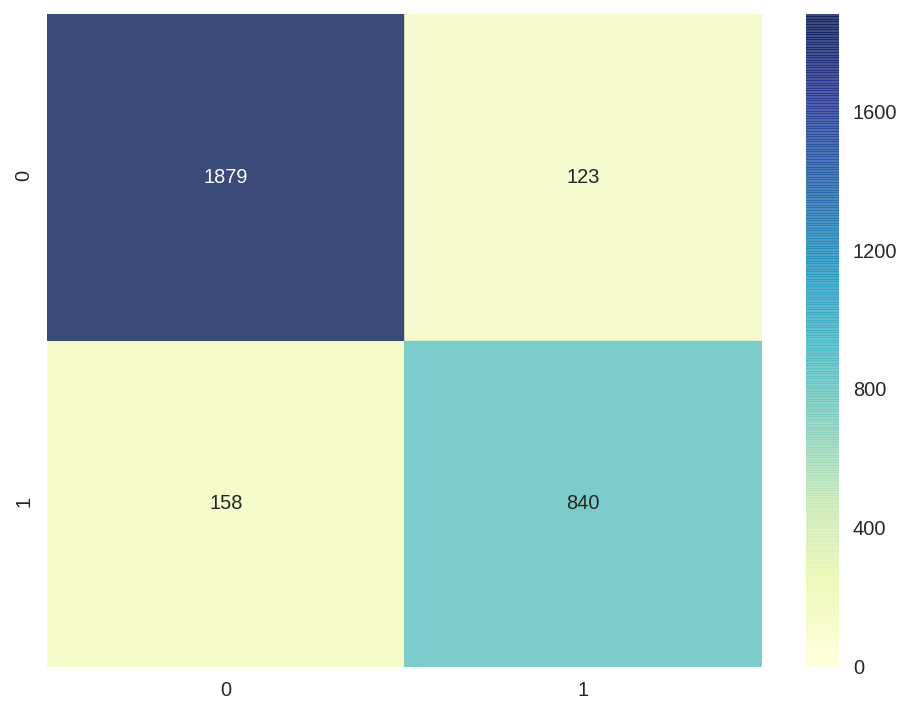

In [53]:
y_pred_7 = model_7.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_7,digits=4))
plot_confusion_matrix(model_7,X_test,Y_test)

In [54]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 94.38 %     loss = 0.020940
Testing Accuracy = 90.63 %    loss = 0.031823


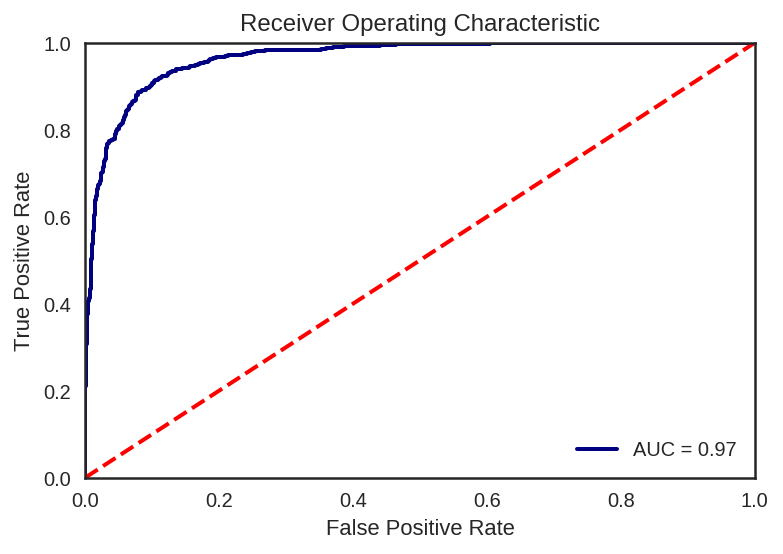

In [55]:
preds_7 = model_7.predict_proba(X_test)
fpr_7, tpr_7, _= roc_curve(Y_test,preds_7)
roc_auc_7 = auc(fpr_7, tpr_7)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_7, tpr_7, 'navy', label = 'AUC = %0.2f' % roc_auc_7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.8 loss = binary crossentropy

In [0]:
loss_8 = losses.binary_crossentropy

In [57]:
model_8 = model(loss_8)
model_8_history = model_8.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.6361 - acc: 0.6677 - val_loss: 0.5529 - val_acc: 0.7367
Epoch 2/100
 - 0s - loss: 0.4986 - acc: 0.7650 - val_loss: 0.4457 - val_acc: 0.7990
Epoch 3/100
 - 0s - loss: 0.4232 - acc: 0.8106 - val_loss: 0.3989 - val_acc: 0.8230
Epoch 4/100
 - 0s - loss: 0.3939 - acc: 0.8201 - val_loss: 0.3834 - val_acc: 0.8263
Epoch 5/100
 - 0s - loss: 0.3810 - acc: 0.8258 - val_loss: 0.3767 - val_acc: 0.8297
Epoch 6/100
 - 0s - loss: 0.3713 - acc: 0.8310 - val_loss: 0.3667 - val_acc: 0.8357
Epoch 7/100
 - 0s - loss: 0.3631 - acc: 0.8363 - val_loss: 0.3636 - val_acc: 0.8387
Epoch 8/100
 - 0s - loss: 0.3576 - acc: 0.8374 - val_loss: 0.3581 - val_acc: 0.8413
Epoch 9/100
 - 0s - loss: 0.3516 - acc: 0.8412 - val_loss: 0.3566 - val_acc: 0.8410
Epoch 10/100
 - 0s - loss: 0.3470 - acc: 0.8432 - val_loss: 0.3531 - val_acc: 0.8467
Epoch 11/100
 - 0s - loss: 0.3424 - acc: 0.8447 - val_loss: 0.3497 - val_acc: 0.8483
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.2263 - acc: 0.9044 - val_loss: 0.2447 - val_acc: 0.8940
Epoch 35/100
 - 0s - loss: 0.2260 - acc: 0.9038 - val_loss: 0.2509 - val_acc: 0.8933
Epoch 36/100
 - 0s - loss: 0.2228 - acc: 0.9047 - val_loss: 0.2432 - val_acc: 0.8960
Epoch 37/100
 - 0s - loss: 0.2205 - acc: 0.9077 - val_loss: 0.2494 - val_acc: 0.8950
Epoch 38/100
 - 0s - loss: 0.2191 - acc: 0.9085 - val_loss: 0.2455 - val_acc: 0.8980
Epoch 39/100
 - 0s - loss: 0.2177 - acc: 0.9093 - val_loss: 0.2395 - val_acc: 0.8983
Epoch 40/100
 - 0s - loss: 0.2141 - acc: 0.9113 - val_loss: 0.2427 - val_acc: 0.8983
Epoch 41/100
 - 0s - loss: 0.2131 - acc: 0.9107 - val_loss: 0.2409 - val_acc: 0.8973
Epoch 42/100
 - 0s - loss: 0.2122 - acc: 0.9126 - val_loss: 0.2387 - val_acc: 0.9007
Epoch 43/100
 - 0s - loss: 0.2097 - acc: 0.9132 - val_loss: 0.2424 - val_acc: 0.8960
Epoch 44/100
 - 0s - loss: 0.2109 - acc: 0.9144 - val_loss: 0.2394 - val_acc: 0.9007
Epoch 45/100
 - 0s - loss: 0.2070 - acc: 0.9152 - val_loss: 0.2393 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.1874 - acc: 0.9246 - val_loss: 0.2320 - val_acc: 0.8997
Epoch 69/100
 - 0s - loss: 0.1858 - acc: 0.9243 - val_loss: 0.2297 - val_acc: 0.9040
Epoch 70/100
 - 0s - loss: 0.1851 - acc: 0.9250 - val_loss: 0.2372 - val_acc: 0.8980
Epoch 71/100
 - 0s - loss: 0.1856 - acc: 0.9246 - val_loss: 0.2305 - val_acc: 0.9013
Epoch 72/100
 - 0s - loss: 0.1827 - acc: 0.9266 - val_loss: 0.2317 - val_acc: 0.9053
Epoch 73/100
 - 0s - loss: 0.1824 - acc: 0.9266 - val_loss: 0.2289 - val_acc: 0.9043
Epoch 74/100
 - 0s - loss: 0.1832 - acc: 0.9258 - val_loss: 0.2305 - val_acc: 0.9010
Epoch 75/100
 - 0s - loss: 0.1831 - acc: 0.9267 - val_loss: 0.2315 - val_acc: 0.8983
Epoch 76/100
 - 0s - loss: 0.1810 - acc: 0.9274 - val_loss: 0.2355 - val_acc: 0.8993
Epoch 77/100
 - 0s - loss: 0.1820 - acc: 0.9266 - val_loss: 0.2311 - val_acc: 0.9013
Epoch 78/100
 - 0s - loss: 0.1805 - acc: 0.9266 - val_loss: 0.2276 - val_acc: 0.9070
Epoch 79/100
 - 0s - loss: 0.1787 - acc: 0.9277 - val_loss: 0.232

             precision    recall  f1-score   support

          0     0.9334    0.9236    0.9284      2002
          1     0.8499    0.8677    0.8587       998

avg / total     0.9056    0.9050    0.9052      3000



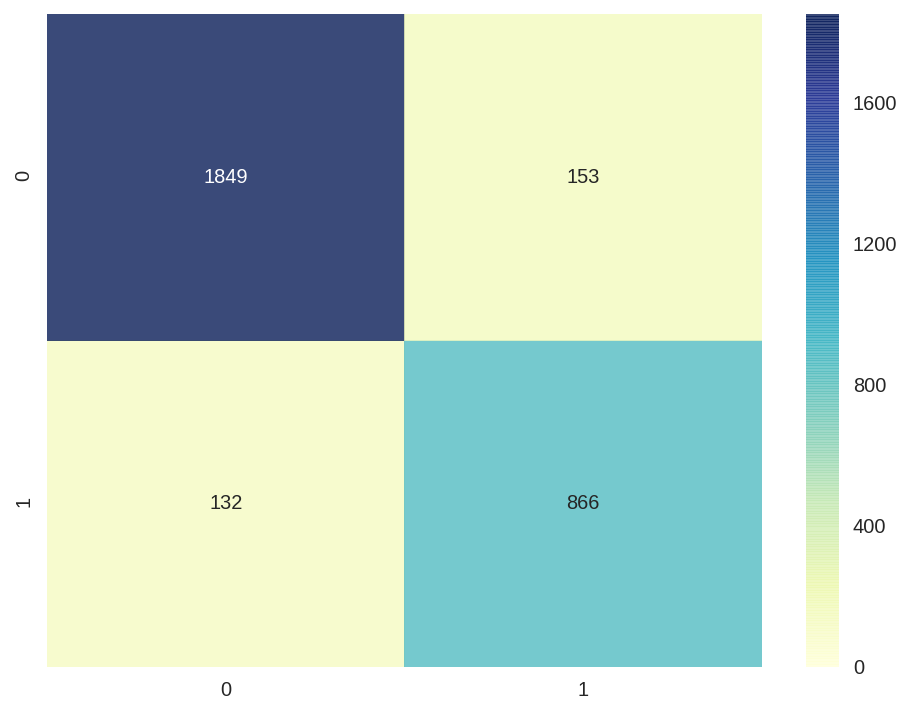

In [58]:
y_pred_8 = model_8.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_8,digits=4))
plot_confusion_matrix(model_8,X_test,Y_test)

In [59]:
train_loss_8, train_accuracy_8 = model_8.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_8 * 100, train_loss_8))
test_loss_8, test_accuracy_8 = model_8.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_8 * 100, test_loss_8))

Training Accuracy = 93.43 %     loss = 0.164048
Testing Accuracy = 90.50 %    loss = 0.230180


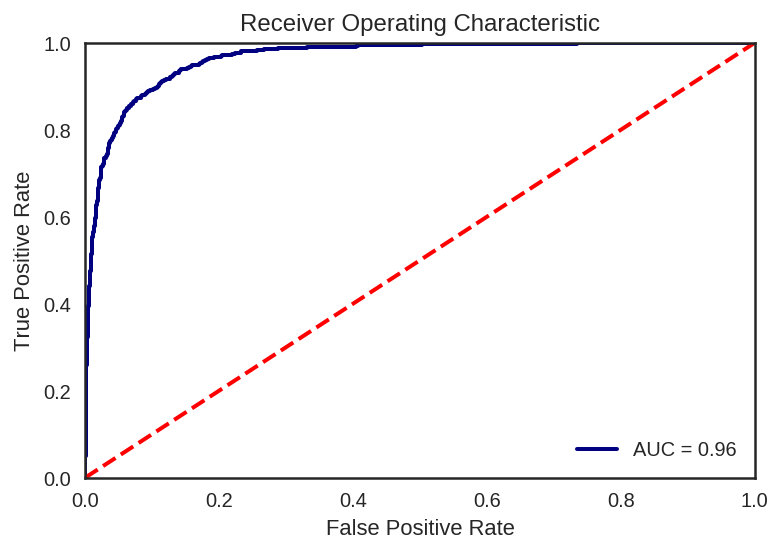

In [60]:
preds_8 = model_8.predict_proba(X_test)
fpr_8, tpr_8, _= roc_curve(Y_test,preds_8)
roc_auc_8 = auc(fpr_8, tpr_8)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_8, tpr_8, 'navy', label = 'AUC = %0.2f' % roc_auc_8)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.9 loss = kullback_leibler_divergence

In [0]:
loss_9 = losses.kullback_leibler_divergence

In [62]:
model_9 = model(loss_9)
model_9_history = model_9.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.1343 - acc: 0.3612 - val_loss: 0.0470 - val_acc: 0.3327
Epoch 2/100
 - 0s - loss: 0.0173 - acc: 0.3335 - val_loss: 0.0047 - val_acc: 0.3327
Epoch 3/100
 - 0s - loss: 0.0026 - acc: 0.3335 - val_loss: 0.0013 - val_acc: 0.3327
Epoch 4/100
 - 0s - loss: 8.9067e-04 - acc: 0.3335 - val_loss: 5.7565e-04 - val_acc: 0.3327
Epoch 5/100
 - 0s - loss: 4.3690e-04 - acc: 0.3335 - val_loss: 3.2039e-04 - val_acc: 0.3327
Epoch 6/100
 - 0s - loss: 2.5848e-04 - acc: 0.3335 - val_loss: 2.0070e-04 - val_acc: 0.3327
Epoch 7/100
 - 0s - loss: 1.6995e-04 - acc: 0.3335 - val_loss: 1.3633e-04 - val_acc: 0.3327
Epoch 8/100
 - 0s - loss: 1.1755e-04 - acc: 0.3335 - val_loss: 9.1895e-05 - val_acc: 0.3327
Epoch 9/100
 - 0s - loss: 6.9914e-05 - acc: 0.3335 - val_loss: 4.5603e-05 - val_acc: 0.3327
Epoch 10/100
 - 0s - loss: 3.6430e-05 - acc: 0.3335 - val_loss: 2.6584e-05 - val_acc: 0.3327
Epoch 11/100
 - 0s - loss: 2.3280e-05 - acc: 0.3335 - 

 - 0s - loss: 2.0826e-07 - acc: 0.3335 - val_loss: 4.4777e-08 - val_acc: 0.3327
Epoch 34/100
 - 0s - loss: 1.2104e-07 - acc: 0.3335 - val_loss: -3.0954e-08 - val_acc: 0.3327
Epoch 35/100
 - 0s - loss: 4.1834e-08 - acc: 0.3335 - val_loss: -9.9176e-08 - val_acc: 0.3327
Epoch 36/100
 - 0s - loss: -2.9645e-08 - acc: 0.3335 - val_loss: -1.6462e-07 - val_acc: 0.3327
Epoch 37/100
 - 0s - loss: -9.5850e-08 - acc: 0.3335 - val_loss: -2.2167e-07 - val_acc: 0.3327
Epoch 38/100
 - 0s - loss: -1.5563e-07 - acc: 0.3335 - val_loss: -2.7583e-07 - val_acc: 0.3327
Epoch 39/100
 - 0s - loss: -2.1118e-07 - acc: 0.3335 - val_loss: -3.2363e-07 - val_acc: 0.3327
Epoch 40/100
 - 0s - loss: -2.6136e-07 - acc: 0.3335 - val_loss: -3.6809e-07 - val_acc: 0.3327
Epoch 41/100
 - 0s - loss: -3.0788e-07 - acc: 0.3335 - val_loss: -4.0946e-07 - val_acc: 0.3327
Epoch 42/100
 - 0s - loss: -3.5137e-07 - acc: 0.3335 - val_loss: -4.4673e-07 - val_acc: 0.3327
Epoch 43/100
 - 0s - loss: -3.9098e-07 - acc: 0.3335 - val_loss: -4

 - 0s - loss: -8.3275e-07 - acc: 0.3335 - val_loss: -8.6903e-07 - val_acc: 0.3327
Epoch 66/100
 - 0s - loss: -8.4225e-07 - acc: 0.3335 - val_loss: -8.7777e-07 - val_acc: 0.3327
Epoch 67/100
 - 0s - loss: -8.5181e-07 - acc: 0.3335 - val_loss: -8.8528e-07 - val_acc: 0.3327
Epoch 68/100
 - 0s - loss: -8.6041e-07 - acc: 0.3335 - val_loss: -8.9295e-07 - val_acc: 0.3327
Epoch 69/100
 - 0s - loss: -8.6864e-07 - acc: 0.3335 - val_loss: -8.9994e-07 - val_acc: 0.3327
Epoch 70/100
 - 0s - loss: -8.7652e-07 - acc: 0.3335 - val_loss: -9.0666e-07 - val_acc: 0.3327
Epoch 71/100
 - 0s - loss: -8.8401e-07 - acc: 0.3335 - val_loss: -9.1294e-07 - val_acc: 0.3327
Epoch 72/100
 - 0s - loss: -8.9109e-07 - acc: 0.3335 - val_loss: -9.1945e-07 - val_acc: 0.3327
Epoch 73/100
 - 0s - loss: -8.9804e-07 - acc: 0.3335 - val_loss: -9.2573e-07 - val_acc: 0.3327
Epoch 74/100
 - 0s - loss: -9.0473e-07 - acc: 0.3335 - val_loss: -9.3101e-07 - val_acc: 0.3327
Epoch 75/100
 - 0s - loss: -9.1075e-07 - acc: 0.3335 - val_loss

 - 0s - loss: -9.9821e-07 - acc: 0.3335 - val_loss: -1.0121e-06 - val_acc: 0.3327
Epoch 98/100
 - 0s - loss: -1.0007e-06 - acc: 0.3335 - val_loss: -1.0141e-06 - val_acc: 0.3327
Epoch 99/100
 - 0s - loss: -1.0029e-06 - acc: 0.3335 - val_loss: -1.0160e-06 - val_acc: 0.3327
Epoch 100/100
 - 0s - loss: -1.0052e-06 - acc: 0.3335 - val_loss: -1.0179e-06 - val_acc: 0.3327


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0     0.0000    0.0000    0.0000      2002
          1     0.3327    1.0000    0.4992       998

avg / total     0.1107    0.3327    0.1661      3000



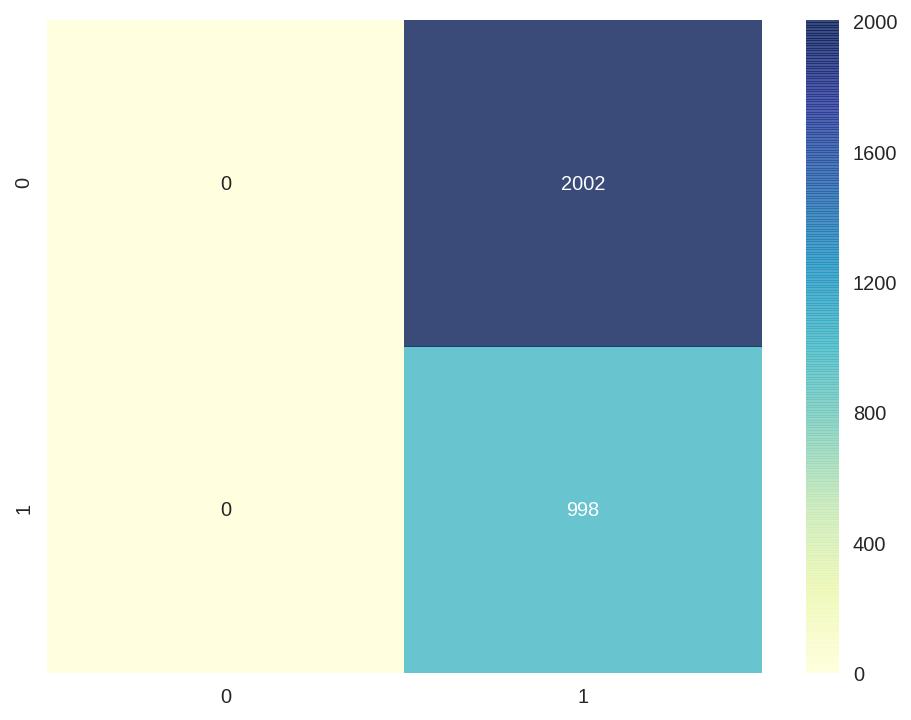

In [63]:
y_pred_9 = model_9.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_9,digits=4))
plot_confusion_matrix(model_9,X_test,Y_test)

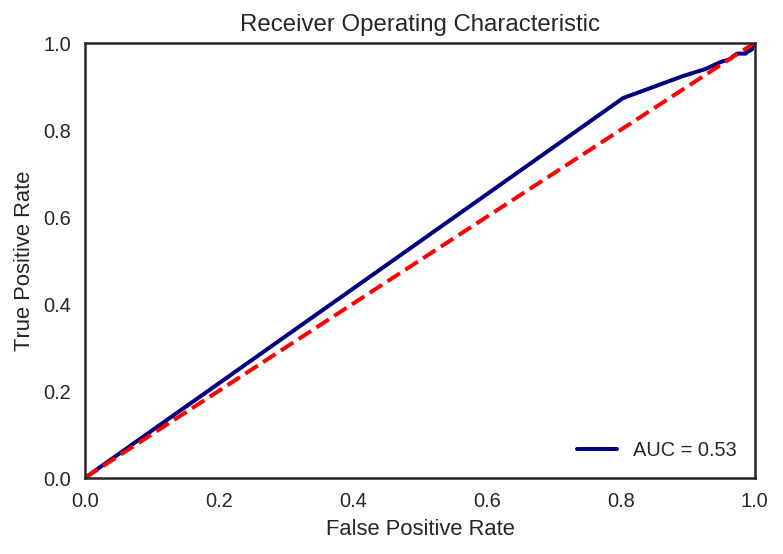

In [64]:
preds_9 = model_9.predict_proba(X_test)
fpr_9, tpr_9, _= roc_curve(Y_test,preds_9)
roc_auc_9 = auc(fpr_9, tpr_9)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_9, tpr_9, 'navy', label = 'AUC = %0.2f' % roc_auc_9)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
loss_10 = losses.poisson

In [66]:
model_10 = model(loss_10)
model_10_history = model_10.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 1s - loss: 0.6603 - acc: 0.7013 - val_loss: 0.6150 - val_acc: 0.7420
Epoch 2/100
 - 0s - loss: 0.5932 - acc: 0.7711 - val_loss: 0.5660 - val_acc: 0.8053
Epoch 3/100
 - 0s - loss: 0.5573 - acc: 0.8099 - val_loss: 0.5455 - val_acc: 0.8253
Epoch 4/100
 - 0s - loss: 0.5440 - acc: 0.8180 - val_loss: 0.5368 - val_acc: 0.8283
Epoch 5/100
 - 0s - loss: 0.5365 - acc: 0.8233 - val_loss: 0.5321 - val_acc: 0.8287
Epoch 6/100
 - 0s - loss: 0.5286 - acc: 0.8288 - val_loss: 0.5295 - val_acc: 0.8300
Epoch 7/100
 - 0s - loss: 0.5221 - acc: 0.8358 - val_loss: 0.5204 - val_acc: 0.8457
Epoch 8/100
 - 0s - loss: 0.5149 - acc: 0.8413 - val_loss: 0.5137 - val_acc: 0.8513
Epoch 9/100
 - 0s - loss: 0.5078 - acc: 0.8473 - val_loss: 0.5091 - val_acc: 0.8553
Epoch 10/100
 - 0s - loss: 0.5004 - acc: 0.8548 - val_loss: 0.5009 - val_acc: 0.8570
Epoch 11/100
 - 0s - loss: 0.4932 - acc: 0.8589 - val_loss: 0.4952 - val_acc: 0.8677
Epoch 12/100
 - 0s - loss

 - 0s - loss: 0.4386 - acc: 0.9138 - val_loss: 0.4570 - val_acc: 0.8933
Epoch 35/100
 - 0s - loss: 0.4381 - acc: 0.9135 - val_loss: 0.4576 - val_acc: 0.8943
Epoch 36/100
 - 0s - loss: 0.4379 - acc: 0.9135 - val_loss: 0.4577 - val_acc: 0.8960
Epoch 37/100
 - 0s - loss: 0.4370 - acc: 0.9152 - val_loss: 0.4553 - val_acc: 0.8963
Epoch 38/100
 - 0s - loss: 0.4363 - acc: 0.9147 - val_loss: 0.4594 - val_acc: 0.8933
Epoch 39/100
 - 0s - loss: 0.4359 - acc: 0.9144 - val_loss: 0.4558 - val_acc: 0.8993
Epoch 40/100
 - 0s - loss: 0.4354 - acc: 0.9173 - val_loss: 0.4535 - val_acc: 0.8980
Epoch 41/100
 - 0s - loss: 0.4360 - acc: 0.9177 - val_loss: 0.4546 - val_acc: 0.8950
Epoch 42/100
 - 0s - loss: 0.4345 - acc: 0.9178 - val_loss: 0.4558 - val_acc: 0.8920
Epoch 43/100
 - 0s - loss: 0.4339 - acc: 0.9177 - val_loss: 0.4557 - val_acc: 0.8950
Epoch 44/100
 - 0s - loss: 0.4329 - acc: 0.9170 - val_loss: 0.4523 - val_acc: 0.9000
Epoch 45/100
 - 0s - loss: 0.4335 - acc: 0.9192 - val_loss: 0.4562 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.4254 - acc: 0.9249 - val_loss: 0.4532 - val_acc: 0.8993
Epoch 69/100
 - 0s - loss: 0.4241 - acc: 0.9257 - val_loss: 0.4540 - val_acc: 0.8993
Epoch 70/100
 - 0s - loss: 0.4242 - acc: 0.9243 - val_loss: 0.4534 - val_acc: 0.9030
Epoch 71/100
 - 0s - loss: 0.4247 - acc: 0.9228 - val_loss: 0.4531 - val_acc: 0.8983
Epoch 72/100
 - 0s - loss: 0.4253 - acc: 0.9229 - val_loss: 0.4585 - val_acc: 0.8933
Epoch 73/100
 - 0s - loss: 0.4242 - acc: 0.9249 - val_loss: 0.4544 - val_acc: 0.9013
Epoch 74/100
 - 0s - loss: 0.4227 - acc: 0.9257 - val_loss: 0.4554 - val_acc: 0.9033
Epoch 75/100
 - 0s - loss: 0.4239 - acc: 0.9243 - val_loss: 0.4549 - val_acc: 0.9020
Epoch 76/100
 - 0s - loss: 0.4214 - acc: 0.9279 - val_loss: 0.4580 - val_acc: 0.9007
Epoch 77/100
 - 0s - loss: 0.4218 - acc: 0.9261 - val_loss: 0.4577 - val_acc: 0.9000
Epoch 78/100
 - 0s - loss: 0.4212 - acc: 0.9268 - val_loss: 0.4572 - val_acc: 0.8997
Epoch 79/100
 - 0s - loss: 0.4218 - acc: 0.9252 - val_loss: 0.464

             precision    recall  f1-score   support

          0     0.9327    0.9206    0.9266      2002
          1     0.8447    0.8667    0.8556       998

avg / total     0.9034    0.9027    0.9030      3000



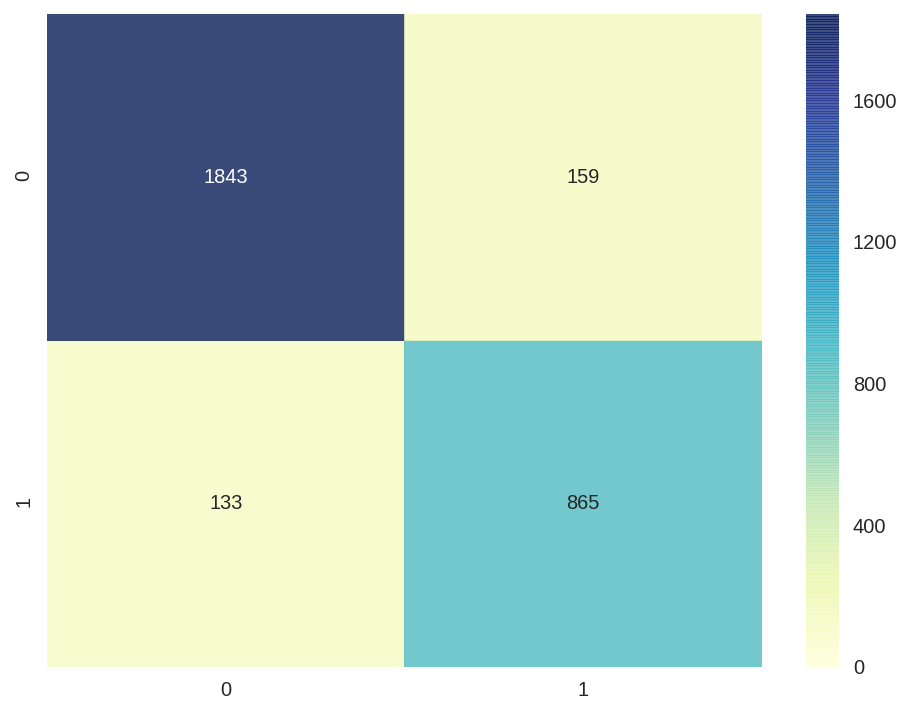

In [67]:
y_pred_10 = model_10.predict_classes(X_test, verbose=0)
print(classification_report(Y_test, y_pred_10,digits=4))
plot_confusion_matrix(model_10,X_test,Y_test)

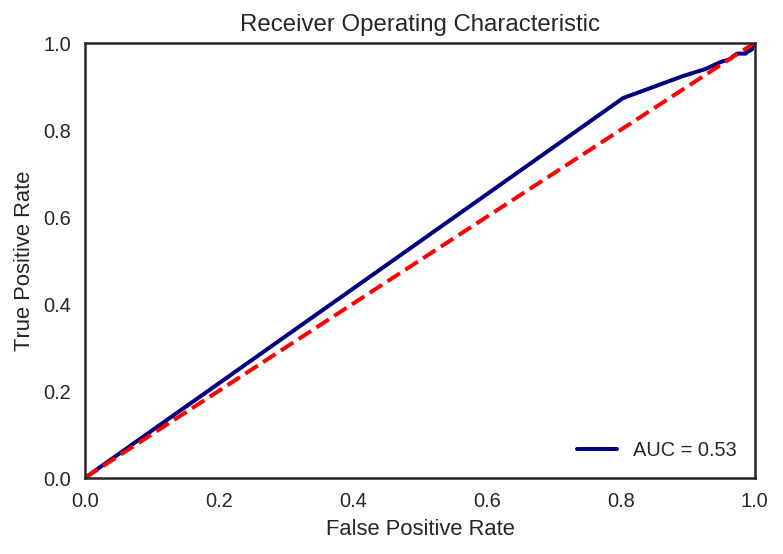

In [68]:
preds_10 = model_10.predict_proba(X_test)
fpr_10, tpr_10, _= roc_curve(Y_test,preds_9)
roc_auc_10 = auc(fpr_10, tpr_10)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_10, tpr_10, 'navy', label = 'AUC = %0.2f' % roc_auc_10)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Plot Training and Testing Accuracy and Loss 

In [0]:
colors = sns.color_palette("tab20", 20)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

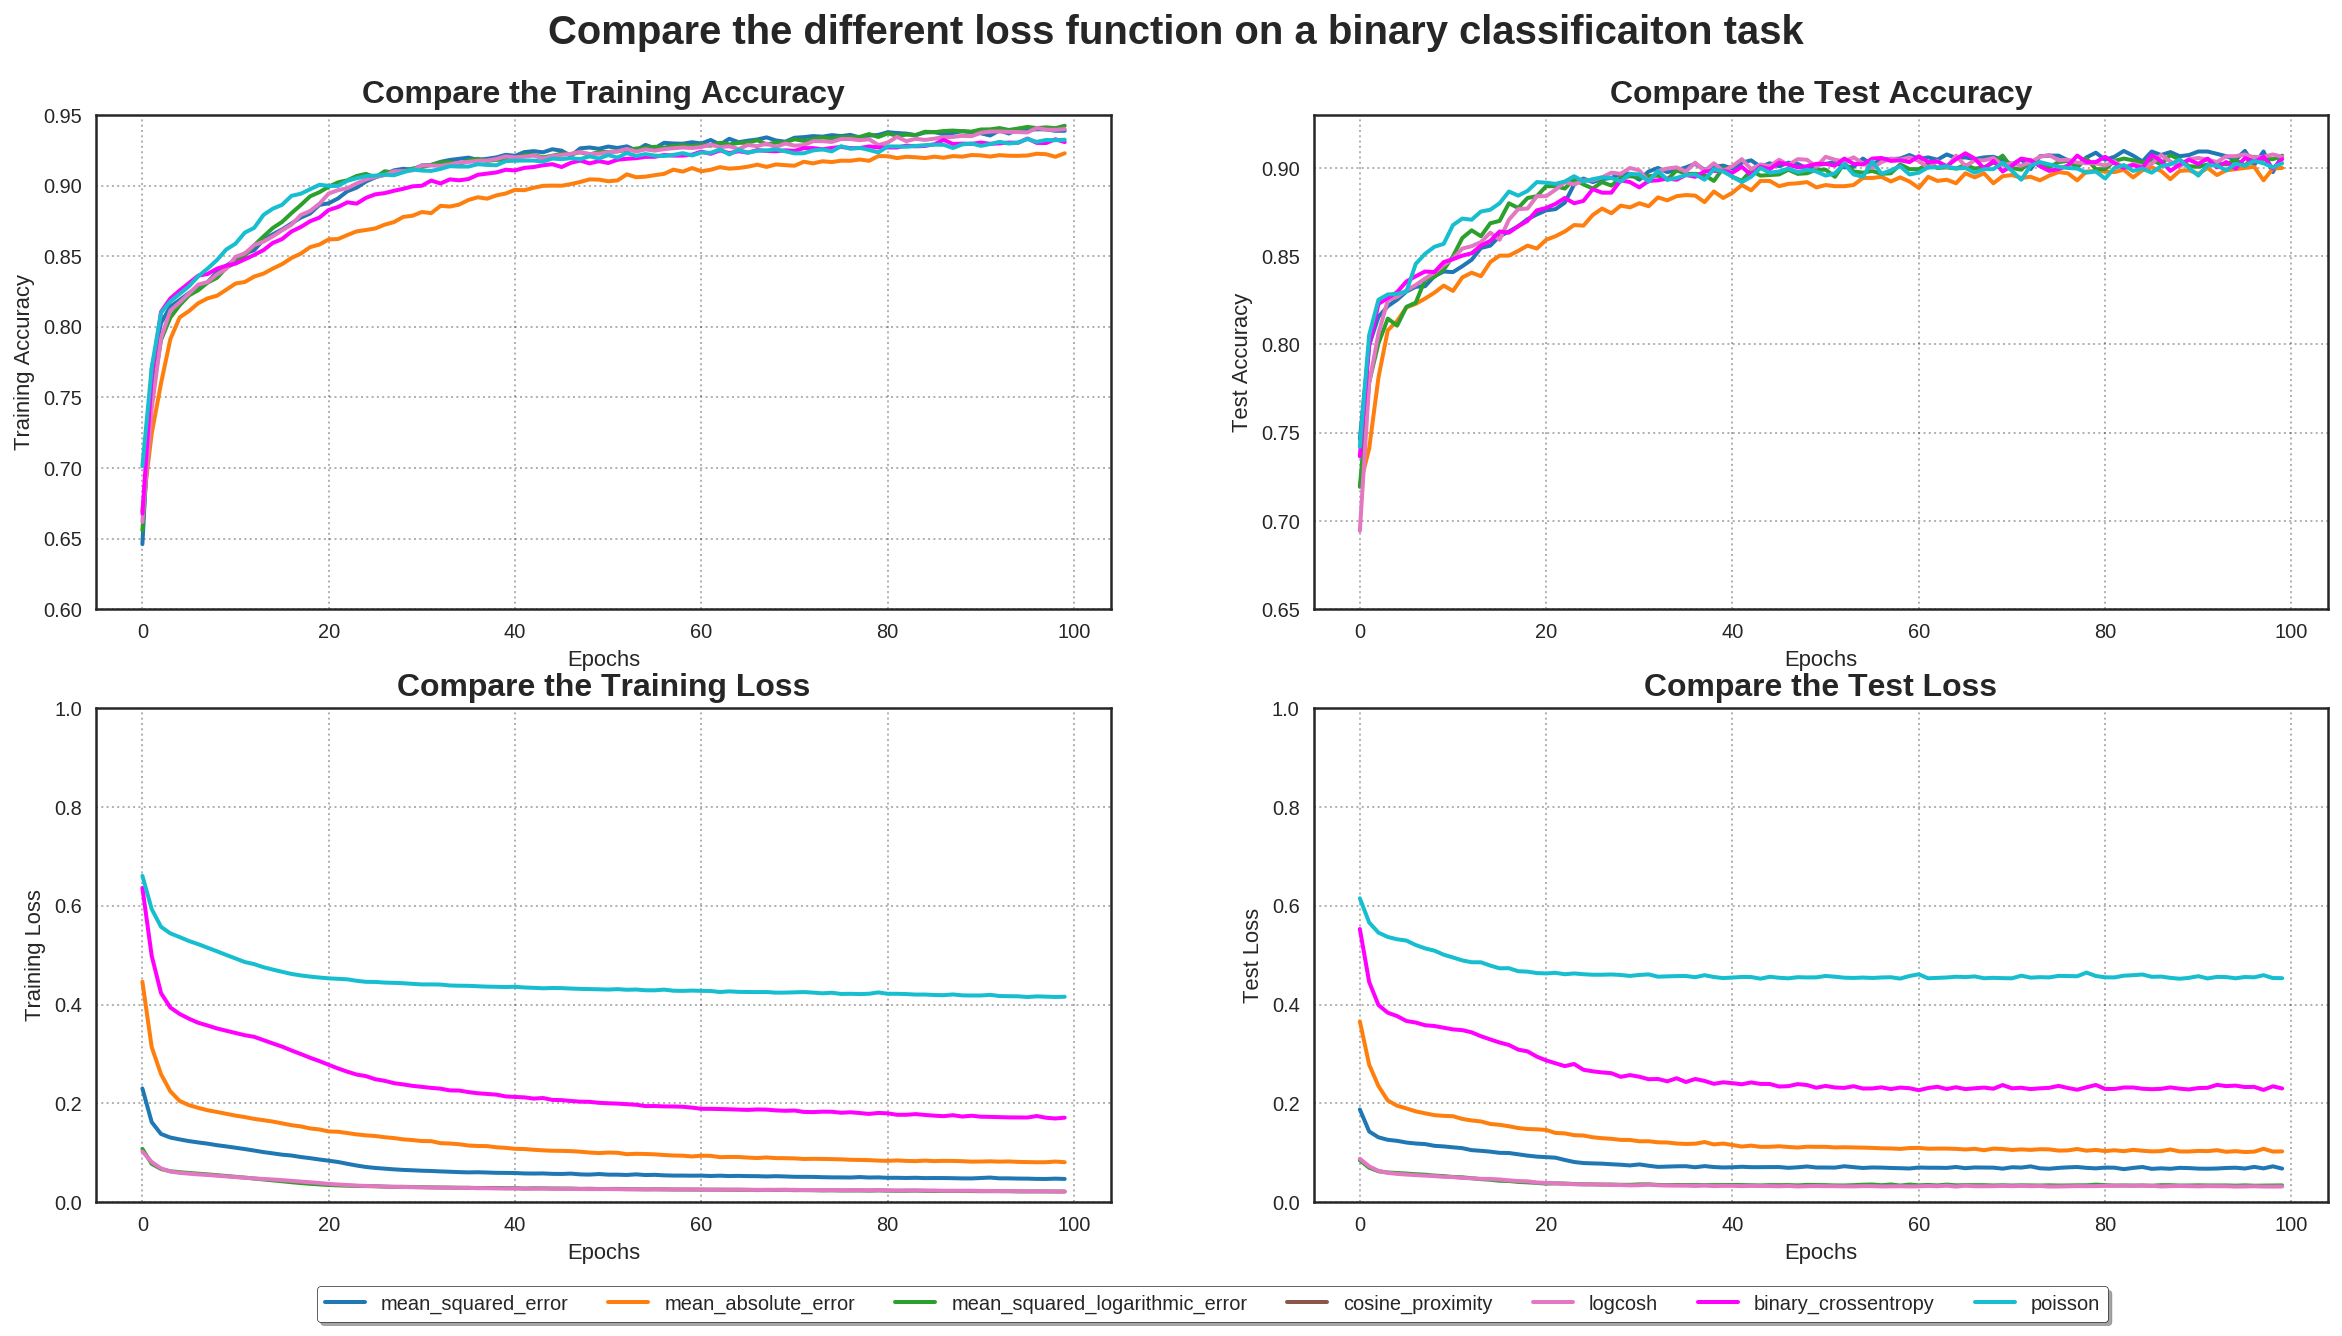

In [86]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='mean_squared_error')
ax1.plot(model_2_history.history['acc'],color=colors[2],label='mean_absolute_error')
ax1.plot(model_3_history.history['acc'],color=colors[4],label='mean_squared_logarithmic_error')
ax1.plot(model_6_history.history['acc'],color=colors[10],label='cosine_proximity')
ax1.plot(model_7_history.history['acc'],color=colors[12],label='logcosh')
ax1.plot(model_8_history.history['acc'],color='fuchsia',label='binary_crossentropy')
ax1.plot(model_10_history.history['acc'],color=colors[18],label='poisson')
ax1.set_xlabel('Epochs')
ax1.set_ylim(0.6,0.95)
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='mean_squared_error')
ax2.plot(model_2_history.history['val_acc'],color=colors[2],label='mean_absolute_error')
ax2.plot(model_3_history.history['val_acc'],color=colors[4],label='mean_squared_logarithmic_error')
ax2.plot(model_6_history.history['val_acc'],color=colors[10],label='cosine_proximity')
ax2.plot(model_7_history.history['val_acc'],color=colors[12],label='logcosh')
ax2.plot(model_8_history.history['val_acc'],color='fuchsia',label='binary_crossentropy')
ax2.plot(model_10_history.history['val_acc'],color=colors[18],label='poisson')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.65,0.93)
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='mean_squared_error')
ax3.plot(model_2_history.history['loss'],color=colors[2],label='mean_absolute_error')
ax3.plot(model_3_history.history['loss'],color=colors[4],label='mean_squared_logarithmic_error')
ax3.plot(model_6_history.history['loss'],color=colors[10],label='cosine_proximity')
ax3.plot(model_7_history.history['loss'],color=colors[12],label='logcosh')
ax3.plot(model_8_history.history['loss'],color='fuchsia',label='binary_crossentropy')
ax3.plot(model_10_history.history['loss'],color=colors[18],label='poisson')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0,1)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='mean_squared_error')
ax4.plot(model_2_history.history['val_loss'],color=colors[2],label='mean_absolute_error')
ax4.plot(model_3_history.history['val_loss'],color=colors[4],label='mean_squared_logarithmic_error')
ax4.plot(model_6_history.history['val_loss'],color=colors[10],label='cosine_proximity')
ax4.plot(model_7_history.history['val_loss'],color=colors[12],label='logcosh')
ax4.plot(model_8_history.history['val_loss'],color='fuchsia',label='binary_crossentropy')
ax4.plot(model_10_history.history['val_loss'],color=colors[18],label='poisson')

ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.set_ylim(0,1)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          ncol=7, fancybox=True, shadow=True, frameon=True,edgecolor='black')


fig.suptitle('Compare the different loss function on a binary classificaiton task',fontsize=20,fontweight='bold',y=0.95)
plt.show()



## Plot the ROC 

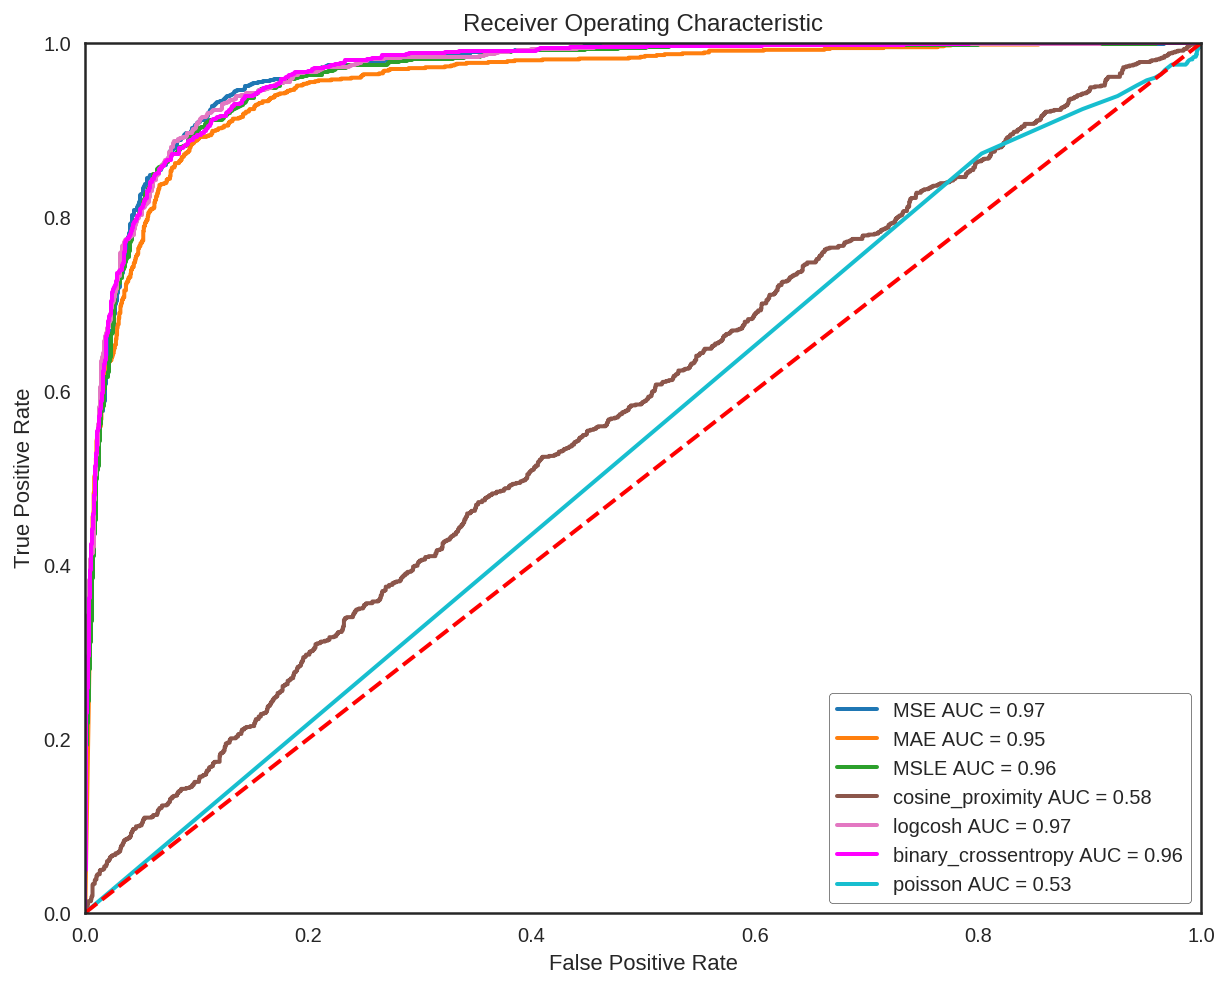

In [71]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('Receiver Operating Characteristic')
ax.plot(fpr_1, tpr_1, color=colors[0],lw=2, label = 'MSE AUC = %0.2f' % roc_auc_1)
ax.plot(fpr_2, tpr_2, color=colors[2],lw=2, label = 'MAE AUC = %0.2f' % roc_auc_2)
ax.plot(fpr_3, tpr_3, color=colors[4],lw=2, label = 'MSLE AUC = %0.2f' % roc_auc_3)
ax.plot(fpr_6, tpr_6, color=colors[10],lw=2, label = 'cosine_proximity AUC = %0.2f' % roc_auc_6)
ax.plot(fpr_7, tpr_7, color=colors[12],lw=2, label = 'logcosh AUC = %0.2f' % roc_auc_7)
ax.plot(fpr_8, tpr_8, color='fuchsia',lw=2, label = 'binary_crossentropy AUC = %0.2f' % roc_auc_8)
ax.plot(fpr_10, tpr_10, color=colors[18],lw=2, label = 'poisson AUC = %0.2f' % roc_auc_10)
ax.legend(loc = 'best',frameon=True,edgecolor='black')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
